## Fitbit Timeseries Project
#### Corey Solitaire   
`11-03-2020`

<div class="alert alert-block alert-info"><b></b></div>

## Executive Summary: 

*****

**Project Summary:**   
The purpose to this project was to clean and explore an unlabled fitness tracker dataset, to provide evidence to support characterization of an individual, and to utilize time series analysis to predict two missing weeks of tracker data.  

**Background:**   
Here at Big Research Co.®, we love data so much - everyone wears Fitbits, even our employees! We believe these watches are the next step in the Big Data Industry and help enhance our current research. Our research spans from fitness equipment and drug trials to very ethical human experimentation.
However, someone in a research and develoment lab mixed up the labels for our Fitbit datasets and one was left out.

**Process:**   
Data set was combined from eight csv files in Excel.  97% of food log data was missing, so values were dropped.  This resulted in a data frame that was 10 columns by 225 rows, with each row representing a specific day. Data was explored and weekly trends were obsereved.  Data was applied to several time series models, with a seven-day moving average providing the lowest RMSE.  When this model was applied, it resulted in a 29% improvement over baseline (last observed value).  

**Results and Conclusions:**   
General trends in the data demonstrate a slight upward trend in calories and activity over time, with the majority of higher activity levels occuring on the weekend.  The lack of regular exercise, the lenght of time spendt sedentary and the the missing food data suggest this fitness tracker belongs to an employee. While the model was able to improve on baseline observations, I was not able to match a model to weekly seasonality.  There exists the possibility that alternate modeling techiniques (TSA with Prophet) would return better results; however, this modeling technique was not included in this study.  

**Reccomendations:**   
- **Not Enough Data:** With only seven months of data, it was difficult to pick up longterm trends in seasonality.  More data would have yeilded better results.    
- **New Model:** Spending time refining previous cycle model and exploring Prophet would improve model forcasting.    
- **Cross Validation:** Time-based splitting can provide statistically robust model evaluation and best simulate real-life scenarios. Exploring the use of time-based cross validation to form a type of “sliding window” average would most likely lead to better model results.

<div class="alert alert-block alert-info"><b></b></div>

## Project Goals: 

***** 
To review six months of Fitbit data in order to characterize the person who wore the fitness tracker (employee or test subject status unknown) and predict the next two weeks worth of data that is missing.  


## Deliverables:

*****
1. A jupyter notebook containing your analysis
2. A clean data set. The source data is a little messy and there is some work that needs to be done before you can effectively work with it. Your notebook should include the code to go from the original source data to a data set that you can work with.
3. A summarization of the data, ie what can you say about the individual who was wearing this fitness tracker?
4. Predictions for the missing two weeks worth of data in a separate csv file.

<div class="alert alert-block alert-info"><b></b></div>

## Workflow:

*****

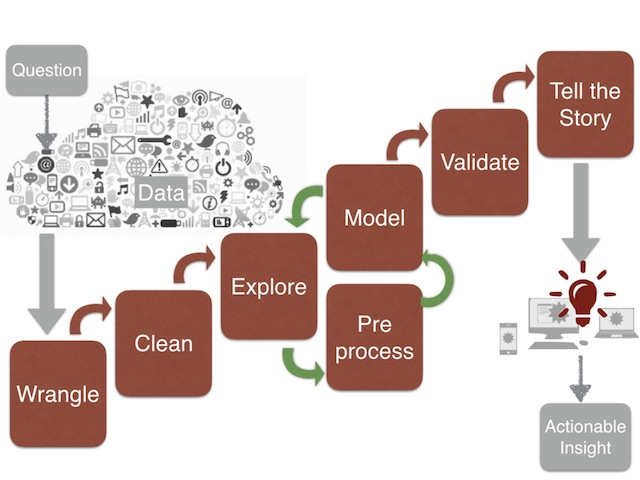

<div class="alert alert-block alert-info"><b></b></div>

## Imports:

In [1]:
import numpy as np
import pandas as pd

import wrangle
import explore
import model

from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

import statsmodels.api as sm
from statsmodels.tsa.api import Holt

import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

<div class="alert alert-block alert-info"><b></b></div>

## Data Acquisition:

<div class="alert alert-block alert-info"><b></b></div>


#### CSV Cleanup and Combination in Excel:

1. Data in CSV needed to be formatted. I chose to format in Excel.

2. In Excel, only eight of 248 daily food logs were recorded. With 97% of data missing I decided to drop the food log columns.'Calories_in' was also dropped for the same reason.

3. There are two weeks of missing rows of data at the end of the dataframe. The last activity entries were from 12/6. Because no activity entries have been missing in this dataset, I chose to delete the missing values after 12/6. The data for these dates will be extrapolated from modeling.

4. This leaves a df that is ten colums by 225 rows (or 225 days worth of data) where one day = one row.



<div class="alert alert-block alert-info"><b></b></div>

## Data Preparation:

<div class="alert alert-block alert-info"><b></b></div>

#### Function: wrangle.wrangle_fitbit_explore()

1. Reads in formatted CSV from Excel
2. Converts date to datetime
3. Sorts index by day
4. Create new features of year, month, weekday
5. Sets those features to categories for explore
6. returns df

In [2]:
df = wrangle.wrangle_fitbit_explore()
df.head()

calories_burned   steps  distance  floors  mins_sedentary  \
date                                                                    
2018-04-26           2635.0  2931.0      1.38     2.0          1347.0   
2018-04-27           3649.0  9971.0      4.70    19.0          1158.0   
2018-04-28           3379.0  3521.0      1.66     2.0           702.0   
2018-04-29           2851.0  1639.0      0.77     0.0           891.0   
2018-04-30           2825.0  1323.0      0.62     0.0           880.0   

            mins_light_active  mins_fairly_active  mins_very_active  \
date                                                                  
2018-04-26               93.0                 0.0               0.0   
2018-04-27              219.0                46.0              17.0   
2018-04-28              155.0                22.0              11.0   
2018-04-29              122.0                 0.0               0.0   
2018-04-30              104.0                 0.0               0.0   

            activity_calories    Year Month   weekday  
date                                                   
2018-04-26              566.0  2018.0   4.0  Thursday  
2018-04-27             1752.0  2018.0   4.0    Friday  
2018-04-28             1124.0  2018.0   4.0  Saturday  
2018-04-29              602.0  2018.0   4.0    Sunday  
2018-04-30              540.0  2018.0   4.0    Monday

<div class="alert alert-block alert-info"><b></b></div>

## Data Exploration:

<div class="alert alert-block alert-info"><b></b></div>

#### Function: explore.split_validate() 

1. Splits data set in to train (0.5), validate (0.3), and test (.2)
2. Returns print statements that verify splits have been preformed correctly

In [3]:
train, validate, test = explore.split_validate(df)
train.shape, validate.shape, test.shape

Does the length of each df equate to the length of the original df?
True
Does the first row of original df equate to the first row of train?
            calories_burned  steps  distance  floors  mins_sedentary  \
date                                                                   
2018-04-26             True   True      True    True            True   

            mins_light_active  mins_fairly_active  mins_very_active  \
date                                                                  
2018-04-26               True                True              True   

            activity_calories  Year  Month  weekday  
date                                                 
2018-04-26               True  True   True     True  
Is the last row of train the day before the first row of validate? And the same for validate to test?
Is the last row of test the same as the last row of our original dataframe?


((123, 12), (74, 12), (50, 12))

#### Function: visualize_splits()
1. Takes in train, validate, test
2. Filters for numeric columns and returns datasets visualized

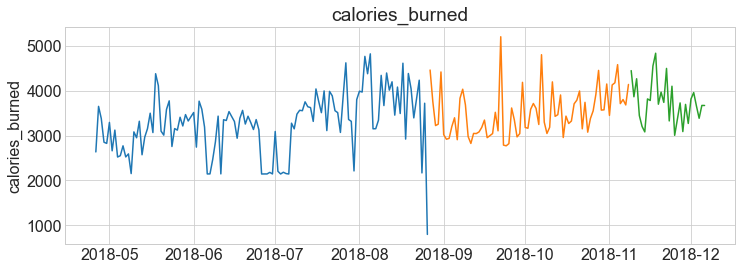

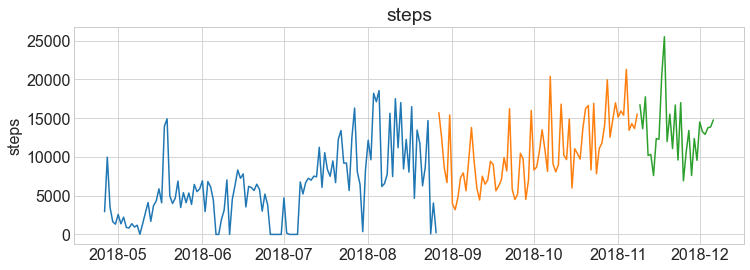

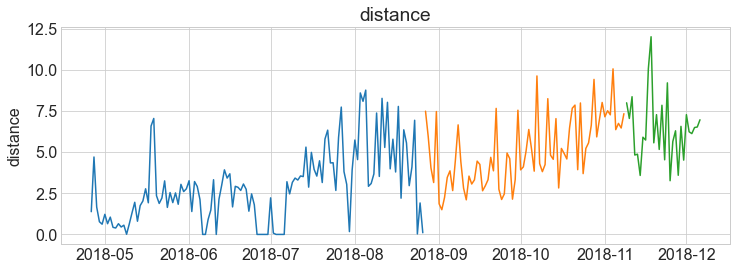

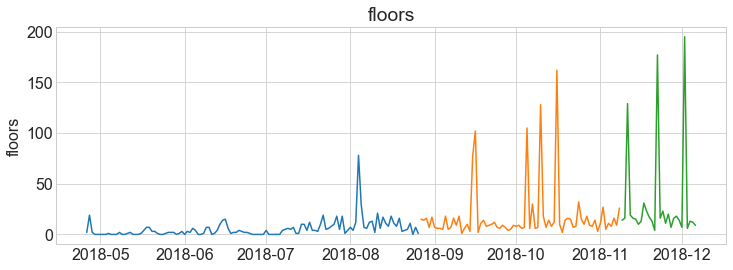

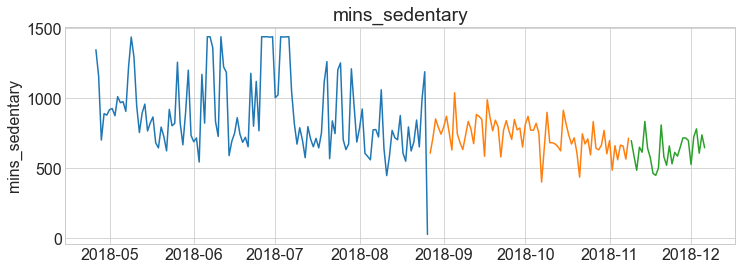

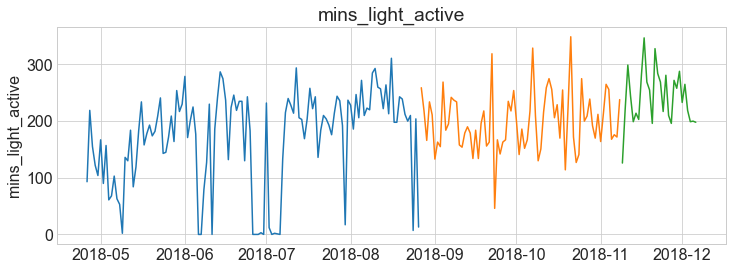

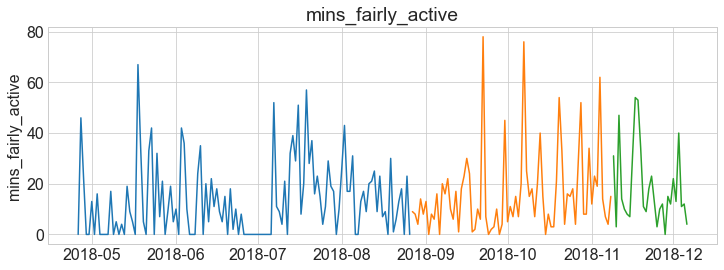

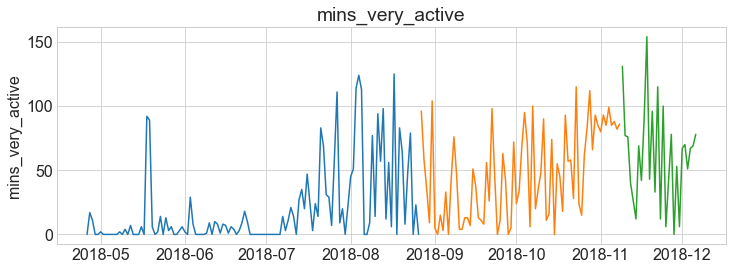

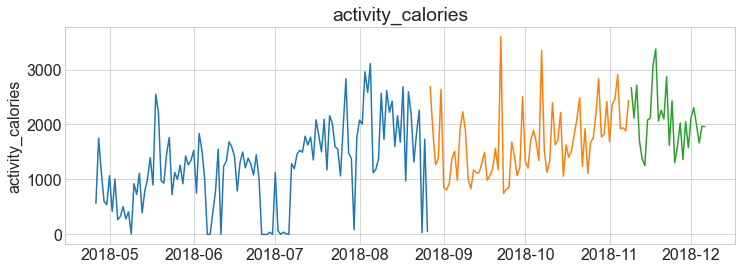

In [4]:
explore.visualize_splits(train,validate,test)

#### Function: numeric_hists()

1. Takes in train
2. Returns numeric historgram for exploration

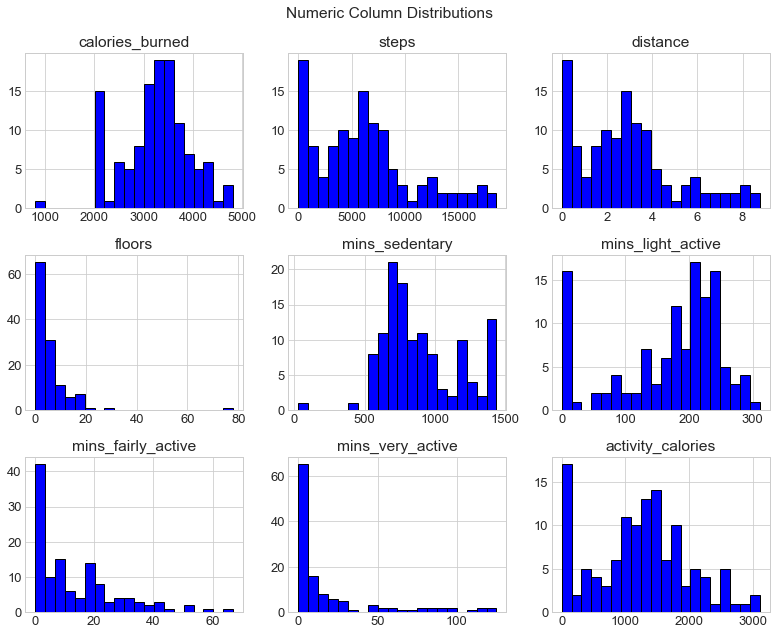

In [5]:
explore.numeric_hists(train)

In [6]:
train.columns

Index(['calories_burned', 'steps', 'distance', 'floors', 'mins_sedentary',
       'mins_light_active', 'mins_fairly_active', 'mins_very_active',
       'activity_calories', 'Year', 'Month', 'weekday'],
      dtype='object')

#### Trends and seasonality:

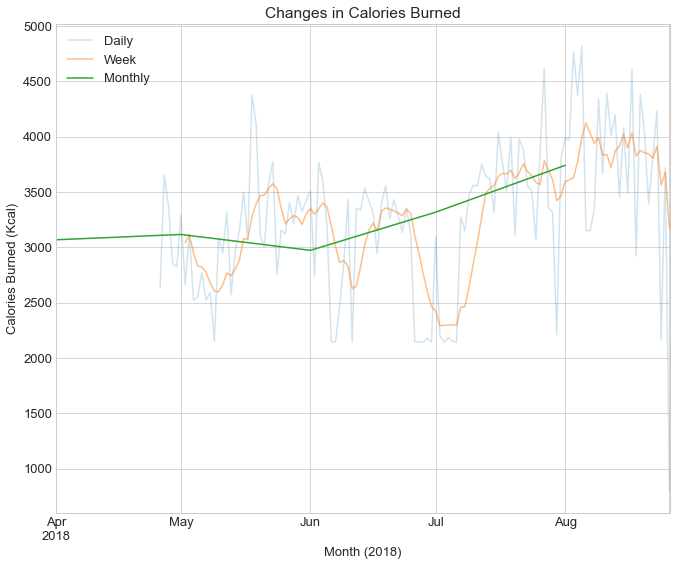

In [7]:
# Rolling Means
y = train.calories_burned
y.plot(alpha=.2, label='Daily')
y.resample('D').mean().rolling(7).mean().plot(alpha=.5, label='Week')
y.resample('M').mean().rolling(1).mean().plot(alpha=8, label='Monthly')
plt.legend()
plt.ylabel("Calories Burned (Kcal)")
plt.xlabel("Month (2018)")
plt.title('Changes in Calories Burned')
plt.show()

calories_burned 



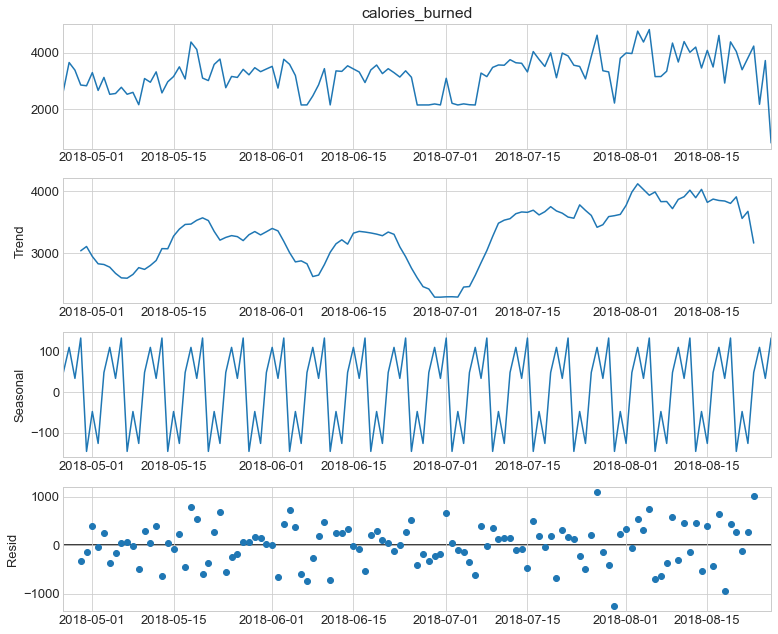

steps 



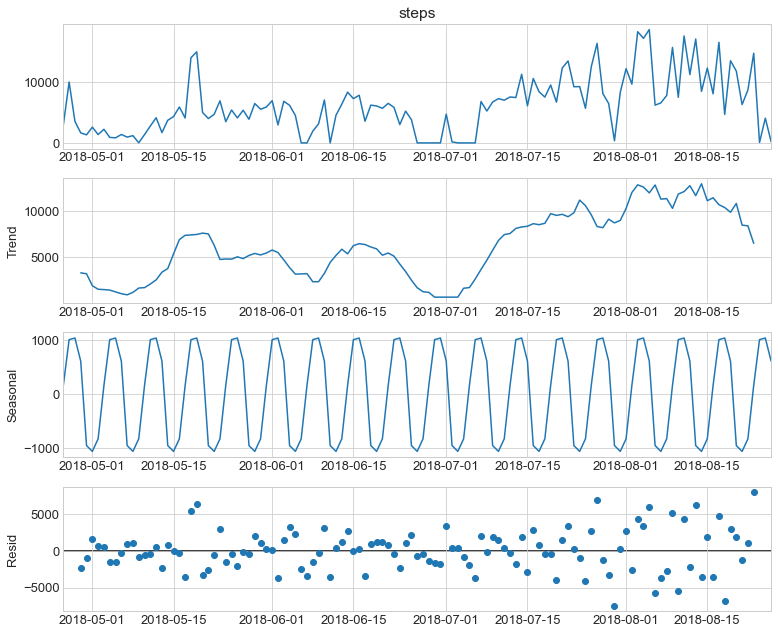

distance 



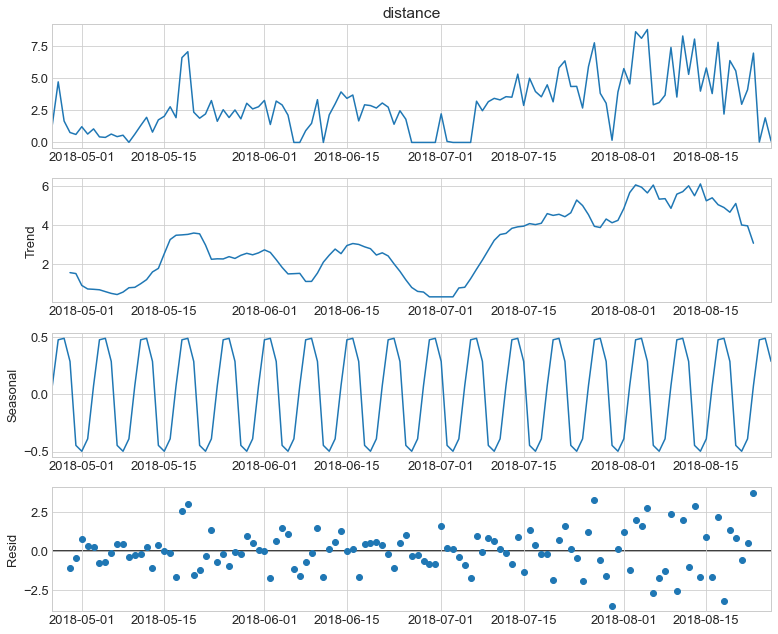

floors 



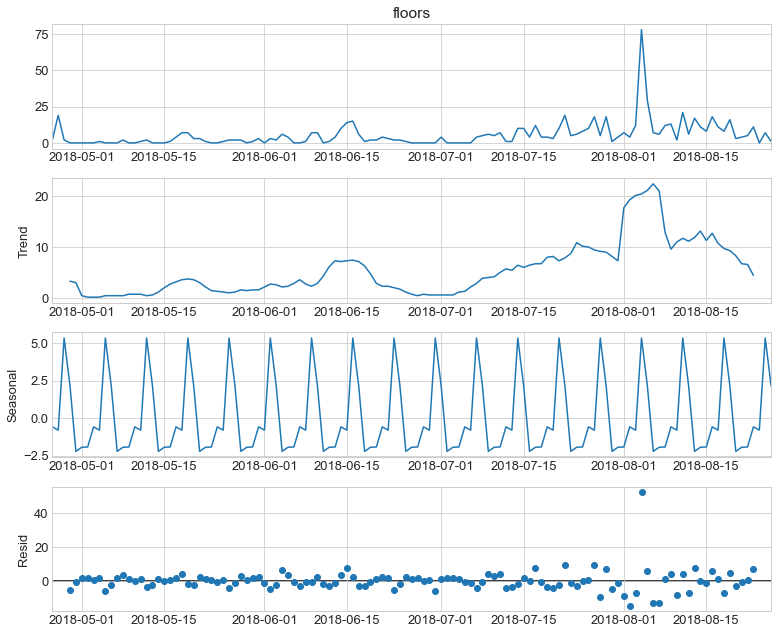

mins_sedentary 



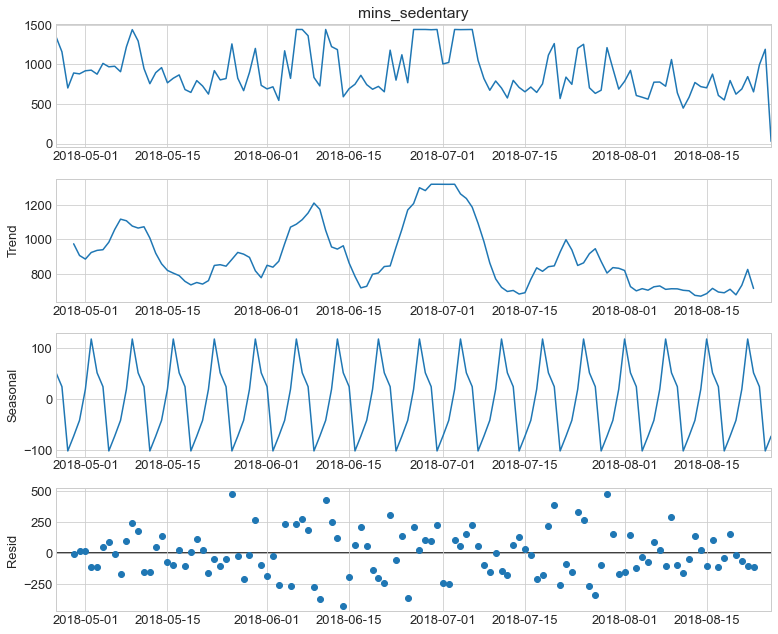

mins_light_active 



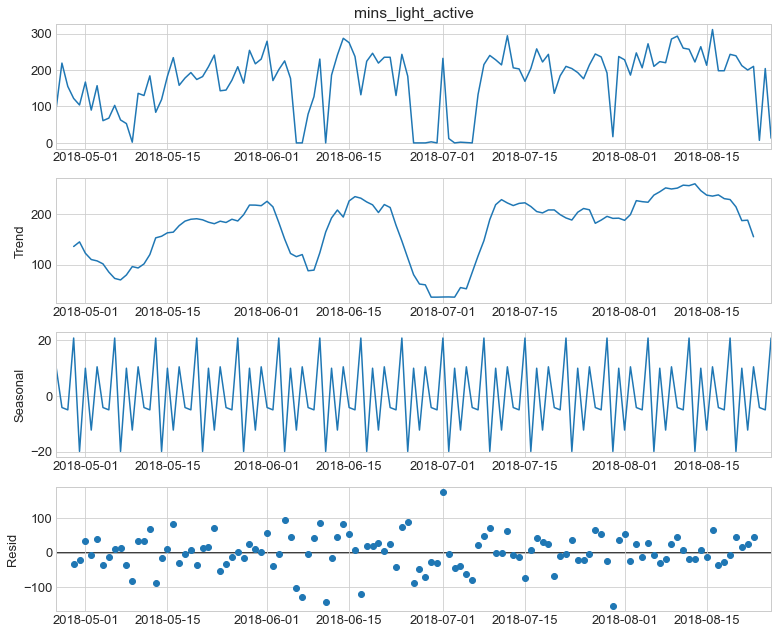

mins_fairly_active 



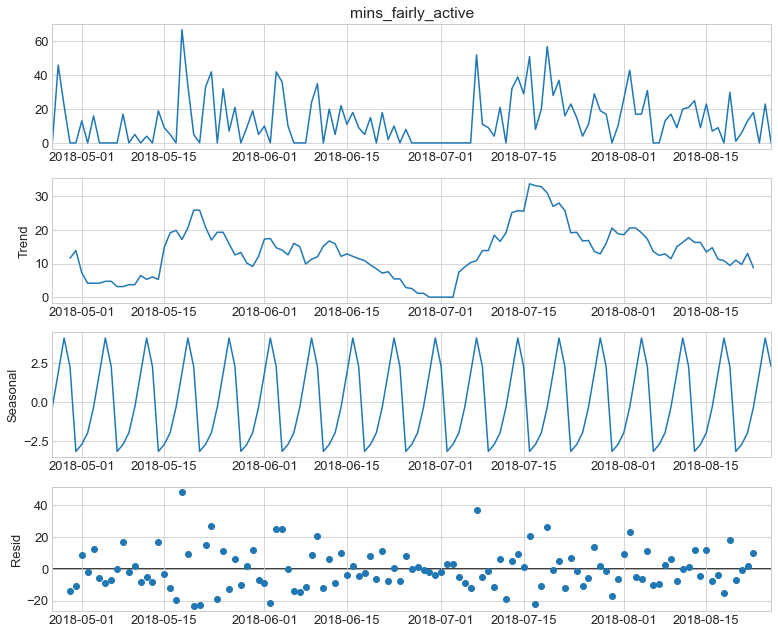

mins_very_active 



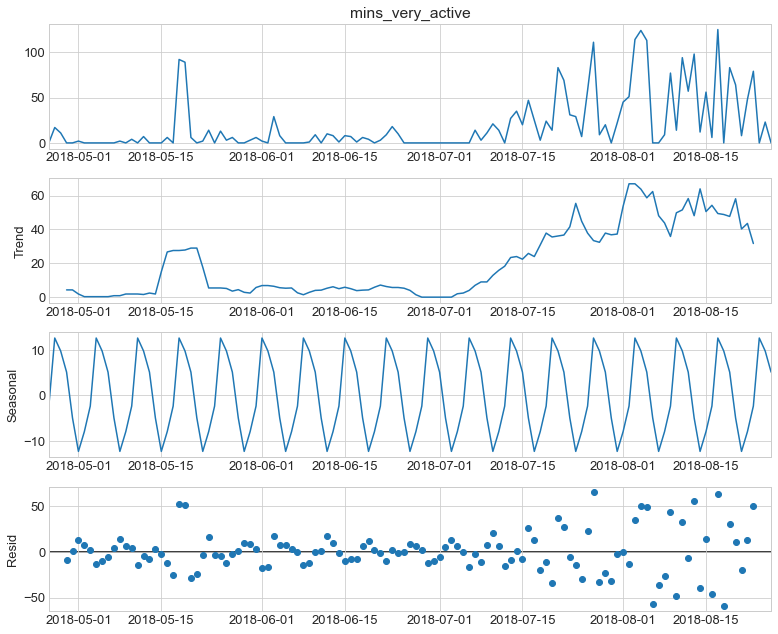

activity_calories 



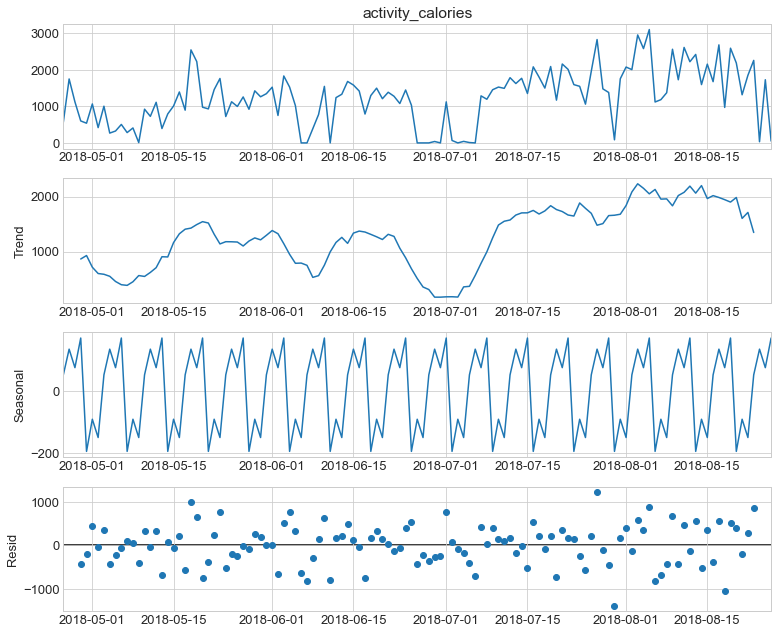

In [8]:
#### Seasonal Decomposition
train1 = train.copy()
train1 = train1[['calories_burned', 'steps', 'distance', 'floors', 'mins_sedentary',
       'mins_light_active', 'mins_fairly_active', 'mins_very_active',
       'activity_calories']]
for col in train1.columns:
    print(col,'\n')
    _ = sm.tsa.seasonal_decompose(train[col].resample('D').mean()).plot()
    plt.show()

`Observations`

1. (months)This individual appears to have worn a fitbit from the end of April to the begining of December.


2. (activity_calories) This individual burned around 1,500 cal per day. However, it appears that they were unable or unwilling to exercise about 15 days during this time period.


3. (distance) This individual walked on averge 3.5 miles a day(about 7,000 steps).


4. (mins_sedentary) This individual spent most of the day sedientary (700 min or 12 hours), and when active, engaged in predominatly light activity.


5. (floors) This individual spent the majority of their time walking up two flight of stairs daily.

`Claims`

**General trends in the data demonstrate a slight upward trend in calories and activity over time, with the majority of higher activity levels occuring on the weekends. The lack of regular exercise, the lenght of time spent sedentary and the the missing food data suggest this fitness tracker belongs to an employee.**



<div class="alert alert-block alert-info"><b></b></div>

## Modeling/ Forecasting:

Forecasting is another word for predicting time series data.

- Last Observed Value
- Simple Average
- Moving Average
- Holt's Linear Trend
- Previous Cycle

<div class="alert alert-block alert-info"><b></b></div>

#### Function: wrangle.wrangle_fitbit_explore()

1. Reads in formatted CSV from Excel
2. Converts date to datetime
3. Sorts index by day
4. returns df

In [9]:
df = wrangle.wrangle_fitbit_model()
df.head()

calories_burned   steps  distance  floors  mins_sedentary  \
date                                                                    
2018-04-26           2635.0  2931.0      1.38     2.0          1347.0   
2018-04-27           3649.0  9971.0      4.70    19.0          1158.0   
2018-04-28           3379.0  3521.0      1.66     2.0           702.0   
2018-04-29           2851.0  1639.0      0.77     0.0           891.0   
2018-04-30           2825.0  1323.0      0.62     0.0           880.0   

            mins_light_active  mins_fairly_active  mins_very_active  \
date                                                                  
2018-04-26               93.0                 0.0               0.0   
2018-04-27              219.0                46.0              17.0   
2018-04-28              155.0                22.0              11.0   
2018-04-29              122.0                 0.0               0.0   
2018-04-30              104.0                 0.0               0.0   

            activity_calories  
date                           
2018-04-26              566.0  
2018-04-27             1752.0  
2018-04-28             1124.0  
2018-04-29              602.0  
2018-04-30              540.0

#### Function: explore.split_validate() 

1. Splits data set in to train (0.5), validate (0.3), and test (.2)
2. Returns print statements that verify splits have been preformed correctly

In [10]:
train, validate, test = explore.split_validate(df)
train.shape, validate.shape, test.shape

Does the length of each df equate to the length of the original df?
True
Does the first row of original df equate to the first row of train?
            calories_burned  steps  distance  floors  mins_sedentary  \
date                                                                   
2018-04-26             True   True      True    True            True   

            mins_light_active  mins_fairly_active  mins_very_active  \
date                                                                  
2018-04-26               True                True              True   

            activity_calories  
date                           
2018-04-26               True  
Is the last row of train the day before the first row of validate? And the same for validate to test?
Is the last row of test the same as the last row of our original dataframe?


((123, 9), (74, 9), (50, 9))

#### Function: visualize_splits()
1. Takes in train, validate, test
2. Filters for numeric colums, and returns datasets visualized

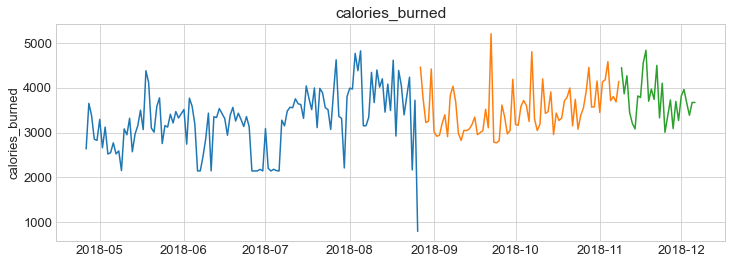

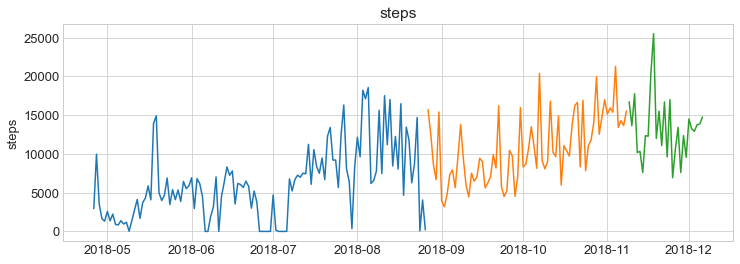

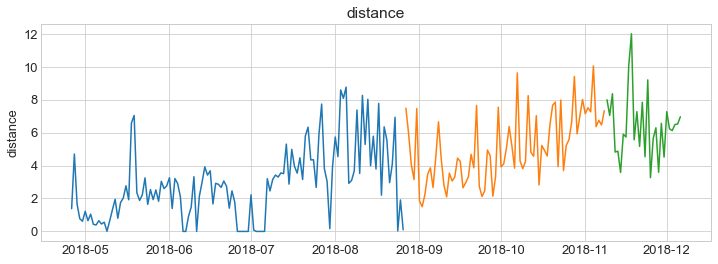

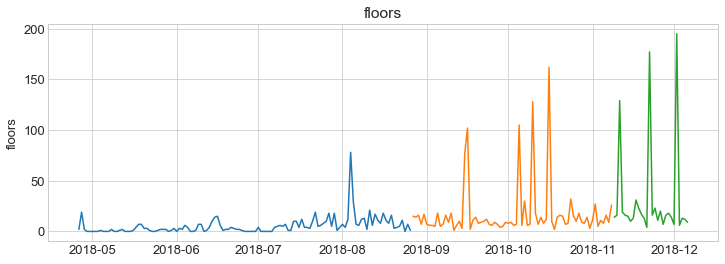

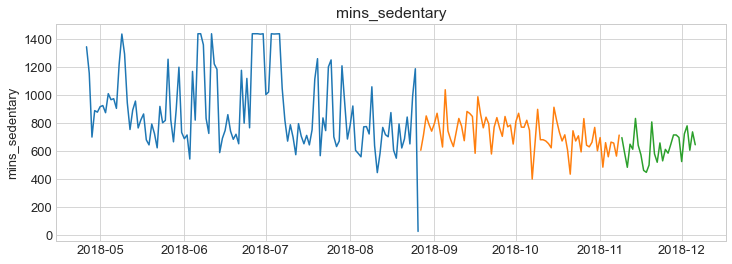

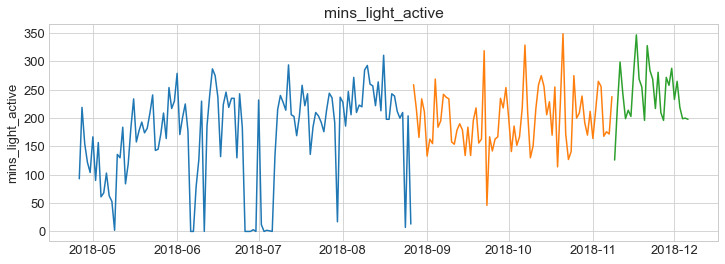

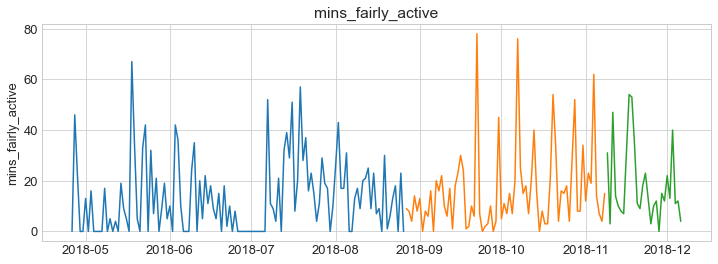

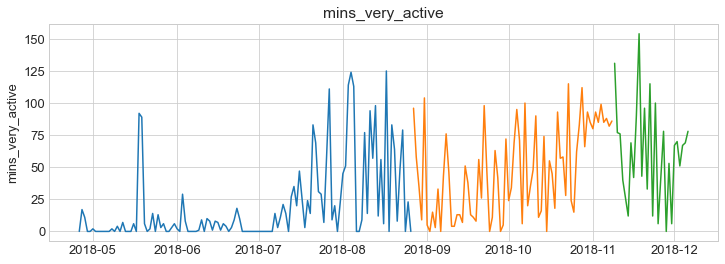

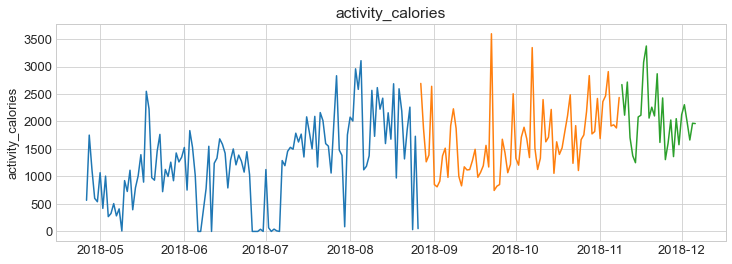

In [11]:
explore.visualize_splits(train,validate,test)

<div class="alert alert-block alert-info"><b></b></div>

#### Create an Evaluate df

In [12]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

<div class="alert alert-block alert-info"><b></b></div>

### Last Observed Value

***

#### Make Predictions:

In [13]:
# calories_burned Prediction
calories_burned  = round(train['calories_burned'][-1:][0], 2)
# steps prediction
steps = round(train['steps'][-1:][0], 2)
# distance prediction
distance = round(train['distance'][-1:][0], 2)
# floors prediction
floors = round(train['floors'][-1:][0], 2)
# mins_sedentary
mins_sedentary = round(train['mins_sedentary'][-1:][0], 2)
# mins_light_active
mins_light_active = round(train['mins_light_active'][-1:][0], 2)
#mins_fairly_active
mins_fairly_active = round(train['mins_fairly_active'][-1:][0], 2)
#'mins_very_active'
mins_very_active = round(train['mins_very_active'][-1:][0], 2)
# activity_calories
activity_calories = round(train['activity_calories'][-1:][0], 2)

#### Apply Predictions to Observations:

In [14]:
yhat_df = pd.DataFrame({'calories_burned': [calories_burned], 
                        'steps': [steps],
                        'distance': [distance],
                        'floors': [floors],
                        'mins_sedentary': [mins_sedentary],
                        'mins_light_active': [mins_light_active],
                        'mins_fairly_active': [mins_fairly_active],
                        'mins_very_active': [mins_very_active],
                        'activity_calories': [activity_calories]},
                      index = validate.index)

#### Plot Actual Vs. Predicted Values:

calories_burned -- RMSE: 2754


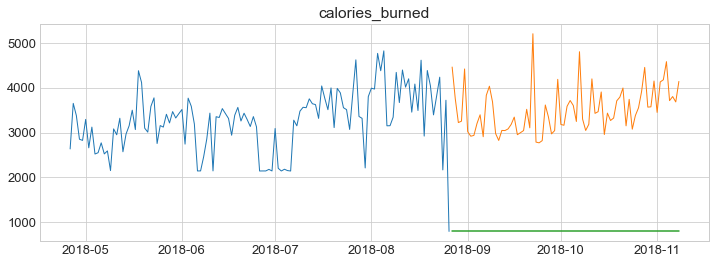

steps -- RMSE: 11348


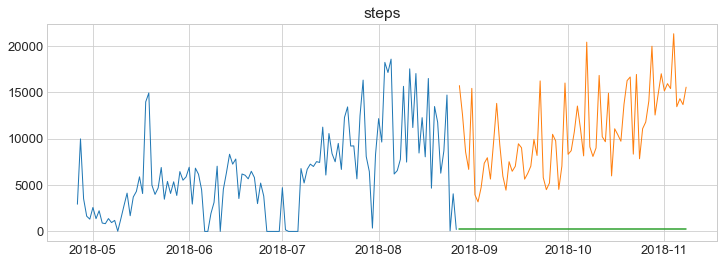

distance -- RMSE: 5


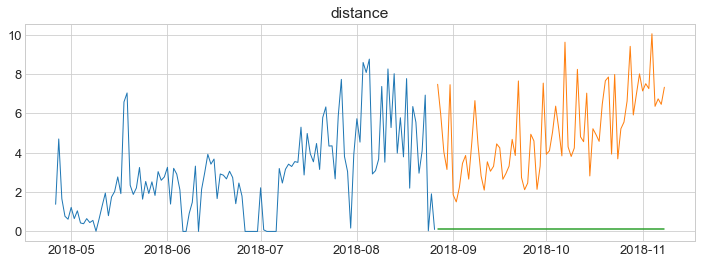

floors -- RMSE: 32


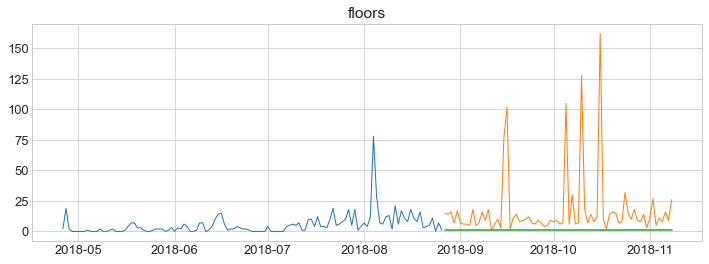

mins_sedentary -- RMSE: 711


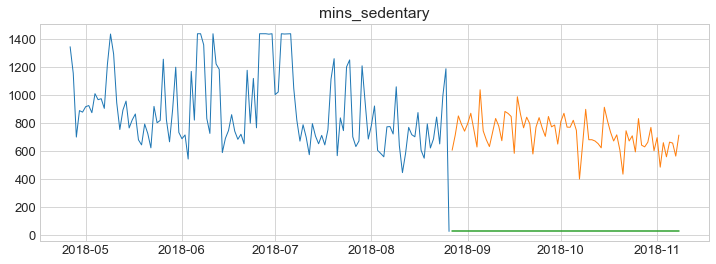

mins_light_active -- RMSE: 193


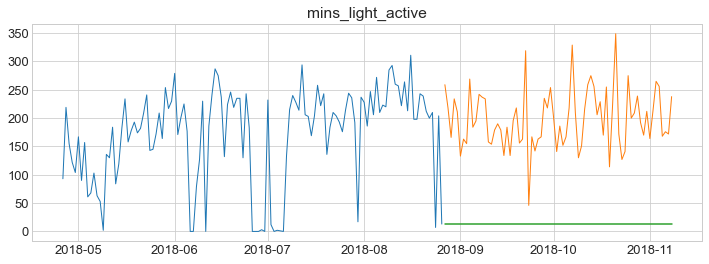

mins_fairly_active -- RMSE: 23


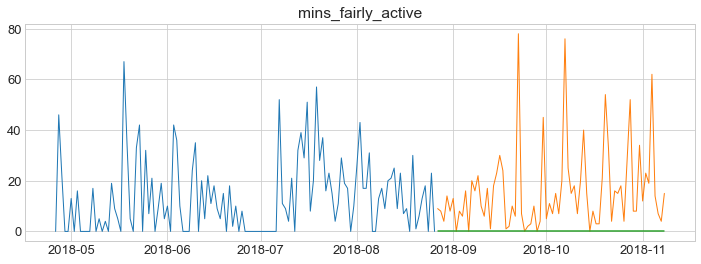

mins_very_active -- RMSE: 59


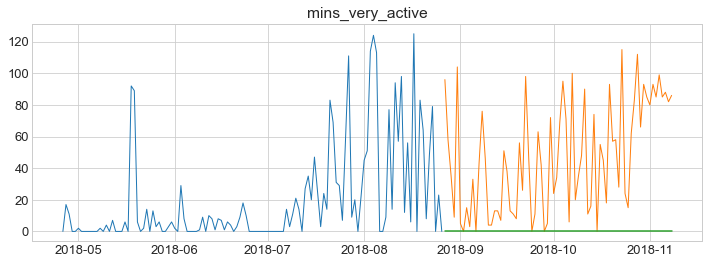

activity_calories -- RMSE: 1726


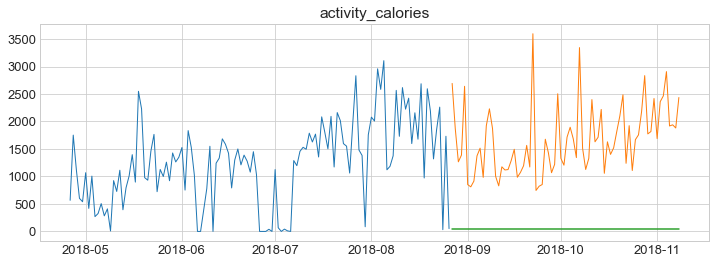

In [15]:
# Use Function to loop through columns
for col in train.columns:
    model.plot_and_eval(train, validate, yhat_df, col)

#### Evaluate:

In [16]:
# Can not make a function to combine these two functions so they are defined here
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [17]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = col)

eval_df

model_type          target_var     rmse
0  last_observed_value     calories_burned   2754.0
1  last_observed_value               steps  11348.0
2  last_observed_value            distance      5.0
3  last_observed_value              floors     32.0
4  last_observed_value      mins_sedentary    711.0
5  last_observed_value   mins_light_active    193.0
6  last_observed_value  mins_fairly_active     23.0
7  last_observed_value    mins_very_active     59.0
8  last_observed_value   activity_calories   1726.0

#### Takeaway:

`The last value in Train just happened to be a day where this individual stopped their regular pattern of behavior.  RMSE is very high, average line is far from validate, model demonstrate low predictive value.`

<div class="alert alert-block alert-info"><b></b></div>

### Simple Average

***

#### Make Predictions:

In [18]:
# calories_burned Prediction
calories_burned  = round(train['calories_burned'].mean(), 2)
# steps prediction
steps = round(train['steps'].mean(), 2)
# distance prediction
distance = round(train['distance'].mean(), 2)
# floors prediction
floors = round(train['floors'].mean(), 2)
# mins_sedentary
mins_sedentary = round(train['mins_sedentary'].mean(), 2)
# mins_light_active
mins_light_active = round(train['mins_light_active'].mean(), 2)
#mins_fairly_active
mins_fairly_active = round(train['mins_fairly_active'].mean(), 2)
#'mins_very_active'
mins_very_active = round(train['mins_very_active'].mean(), 2)
# activity_calories
activity_calories = round(train['activity_calories'].mean(), 2)

#### Apply Predictions to Observations:

In [19]:
yhat_df = pd.DataFrame({'calories_burned': [calories_burned], 
                        'steps': [steps],
                        'distance': [distance],
                        'floors': [floors],
                        'mins_sedentary': [mins_sedentary],
                        'mins_light_active': [mins_light_active],
                        'mins_fairly_active': [mins_fairly_active],
                        'mins_very_active': [mins_very_active],
                        'activity_calories': [activity_calories]},
                      index = validate.index)

#### Plot Actual Vs. Predicted Values:

calories_burned -- RMSE: 570


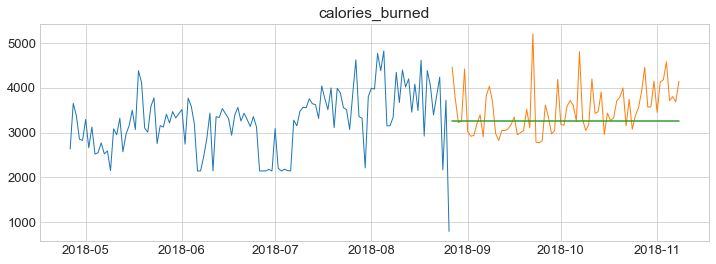

steps -- RMSE: 6271


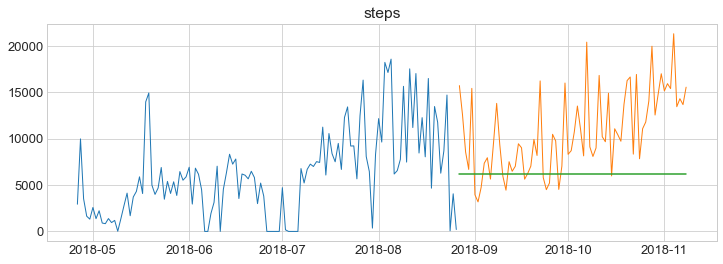

distance -- RMSE: 3


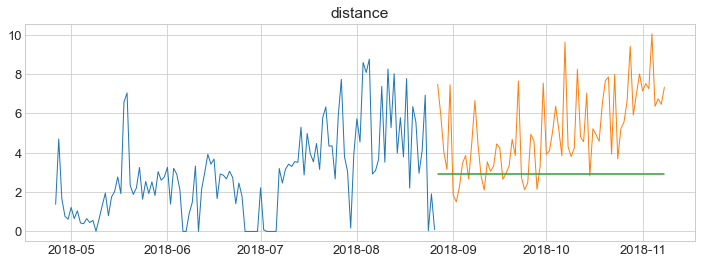

floors -- RMSE: 30


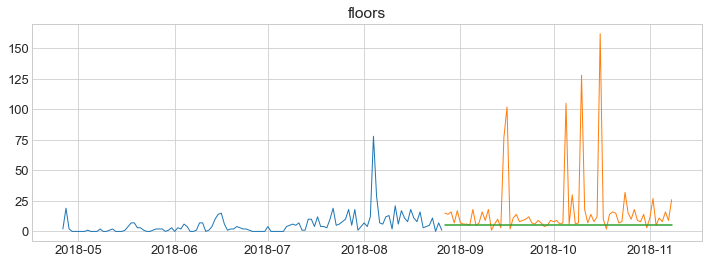

mins_sedentary -- RMSE: 205


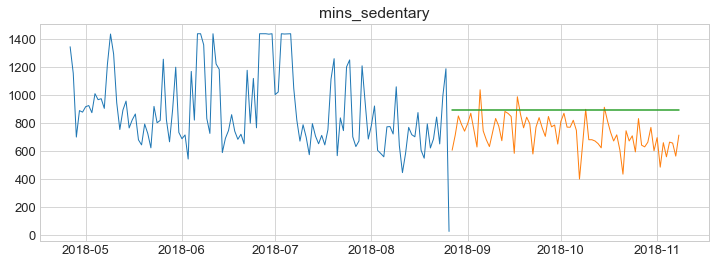

mins_light_active -- RMSE: 59


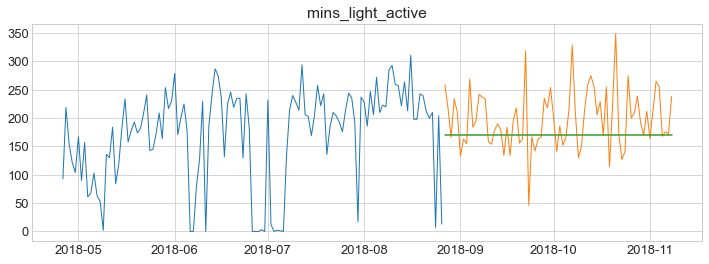

mins_fairly_active -- RMSE: 17


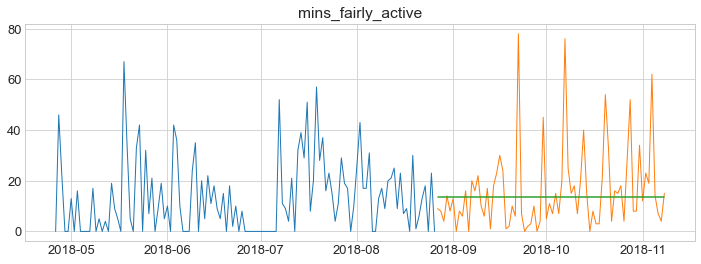

mins_very_active -- RMSE: 45


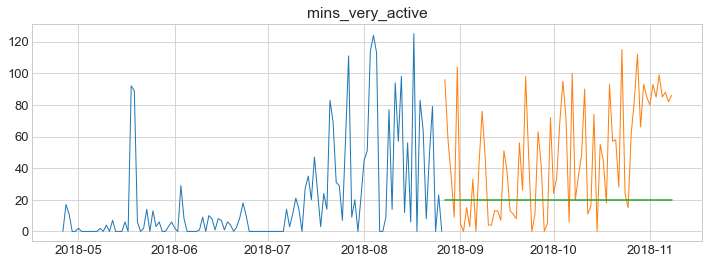

activity_calories -- RMSE: 744


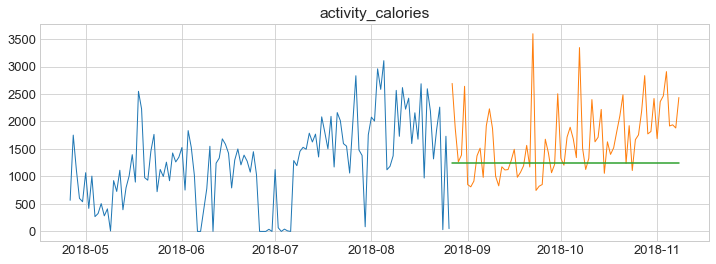

In [20]:
# Use Function to loop through columns
for col in train.columns:
    model.plot_and_eval(train, validate, yhat_df, col)

#### Evauate:

In [21]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'simple_average', 
                             target_var = col)

eval_df.sort_values('rmse')

model_type          target_var     rmse
11       simple_average            distance      3.0
2   last_observed_value            distance      5.0
15       simple_average  mins_fairly_active     17.0
6   last_observed_value  mins_fairly_active     23.0
12       simple_average              floors     30.0
3   last_observed_value              floors     32.0
16       simple_average    mins_very_active     45.0
7   last_observed_value    mins_very_active     59.0
14       simple_average   mins_light_active     59.0
5   last_observed_value   mins_light_active    193.0
13       simple_average      mins_sedentary    205.0
9        simple_average     calories_burned    570.0
4   last_observed_value      mins_sedentary    711.0
17       simple_average   activity_calories    744.0
8   last_observed_value   activity_calories   1726.0
0   last_observed_value     calories_burned   2754.0
10       simple_average               steps   6271.0
1   last_observed_value               steps  11348.0

#### Takeaway:

`Simple average has a lower RMSE than the last observed value. This model has the best predictive value so far.`

<div class="alert alert-block alert-info"><b></b></div>

### Moving Average

***

#### Make Predictions:

In [22]:
# 30 Day Rolling average (notice monthly seasonality)

period = 30 

# calories_burned Prediction
calories_burned  = round(train['calories_burned'].rolling(period).mean()[-1], 2)
# steps prediction
steps = round(train['steps'].rolling(period).mean()[-1], 2)
# distance prediction
distance = round(train['distance'].rolling(period).mean()[-1], 2)
# floors prediction
floors = round(train['floors'].rolling(period).mean()[-1], 2)
# mins_sedentary
mins_sedentary = round(train['mins_sedentary'].rolling(period).mean()[-1], 2)
# mins_light_active
mins_light_active = round(train['mins_light_active'].rolling(period).mean()[-1], 2)
#mins_fairly_active
mins_fairly_active = round(train['mins_fairly_active'].rolling(period).mean()[-1], 2)
#'mins_very_active'
mins_very_active = round(train['mins_very_active'].rolling(period).mean()[-1], 2)
# activity_calories
activity_calories = round(train['activity_calories'].rolling(period).mean()[-1], 2)

#### Apply Predictions to Observations:

In [23]:
yhat_df = pd.DataFrame({'calories_burned': [calories_burned], 
                        'steps': [steps],
                        'distance': [distance],
                        'floors': [floors],
                        'mins_sedentary': [mins_sedentary],
                        'mins_light_active': [mins_light_active],
                        'mins_fairly_active': [mins_fairly_active],
                        'mins_very_active': [mins_very_active],
                        'activity_calories': [activity_calories]},
                      index = validate.index)

#### Plot Actual Vs. Predicted Values:

calories_burned -- RMSE: 540


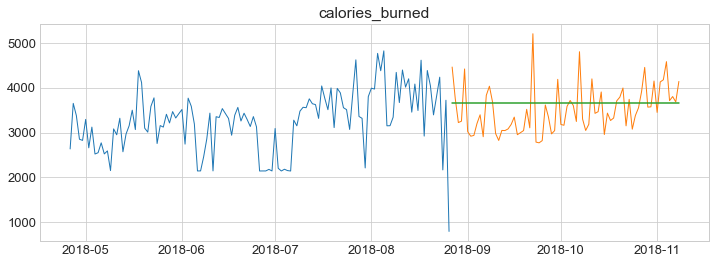

steps -- RMSE: 4380


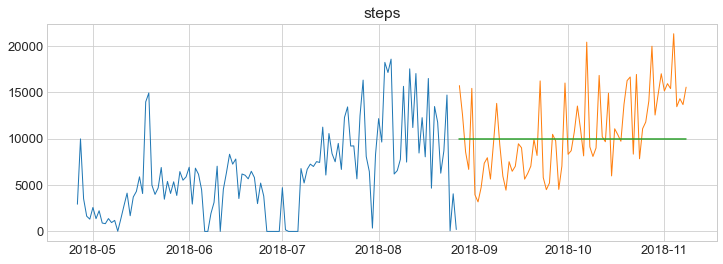

distance -- RMSE: 2


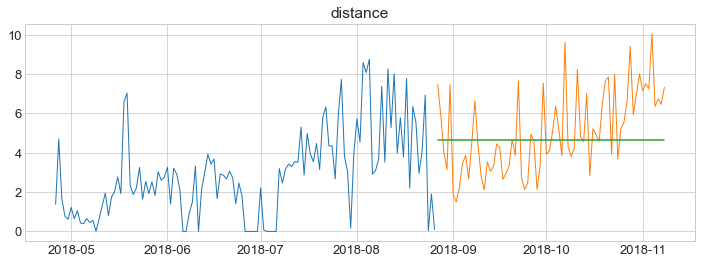

floors -- RMSE: 29


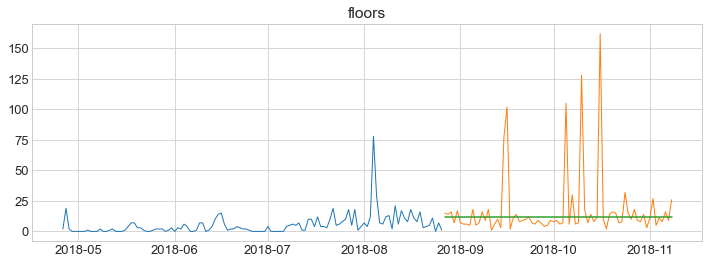

mins_sedentary -- RMSE: 116


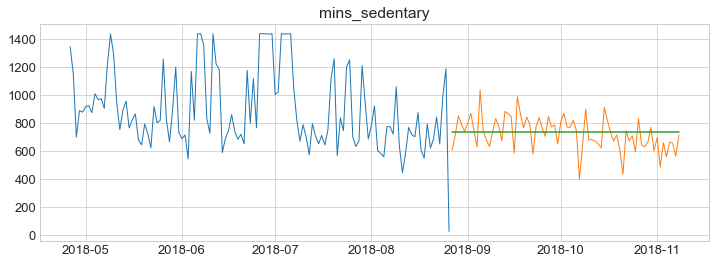

mins_light_active -- RMSE: 53


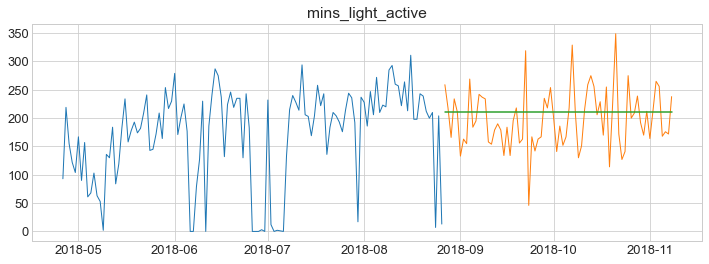

mins_fairly_active -- RMSE: 16


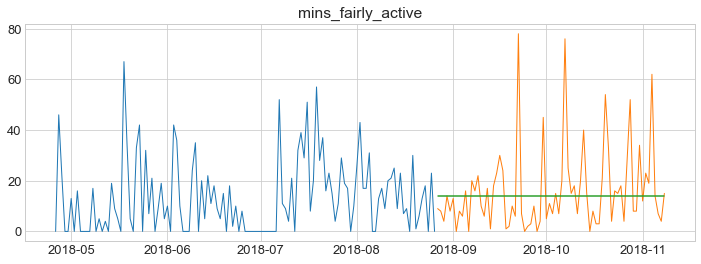

mins_very_active -- RMSE: 35


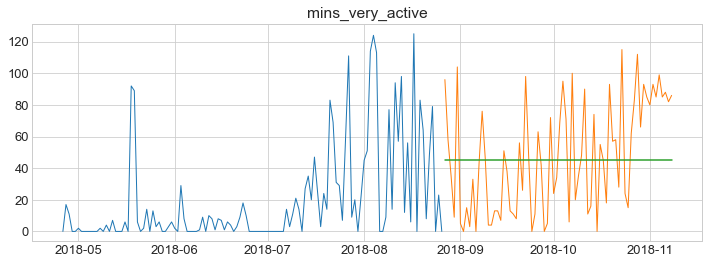

activity_calories -- RMSE: 630


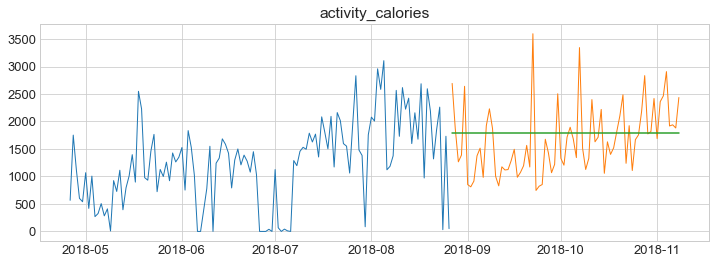

In [24]:
# Use Function to loop through columns
for col in train.columns:
    model.plot_and_eval(train, validate, yhat_df, col)

#### Additional Rolling Averages (To Try)

In [25]:
periods = [1, 7, 12, 26, 52, 104]

for p in periods:
    calories_burned  = round(train['calories_burned'].rolling(period).mean()[-1], 2)
    steps = round(train['steps'].rolling(period).mean()[-1], 2)
    distance = round(train['distance'].rolling(period).mean()[-1], 2)
    floors = round(train['floors'].rolling(period).mean()[-1], 2)
    mins_sedentary = round(train['mins_sedentary'].rolling(period).mean()[-1], 2)
    mins_light_active = round(train['mins_light_active'].rolling(period).mean()[-1], 2)
    mins_fairly_active = round(train['mins_fairly_active'].rolling(period).mean()[-1], 2)
    mins_very_active = round(train['mins_very_active'].rolling(period).mean()[-1], 2)
    activity_calories = round(train['activity_calories'].rolling(period).mean()[-1], 2)
    model_type = str(p) + 'd moving average'
    for col in train.columns:
        eval_df = append_eval_df(model_type = model_type, 
                                 target_var = col)

#### Evauate:

In [26]:
for col in train.columns:
    eval_df = append_eval_df(model_type = '30d_moving_avg', 
                            target_var = col)

eval_df.sort_values('rmse')

model_type target_var     rmse
56   52d moving average   distance      2.0
38   12d moving average   distance      2.0
65  104d moving average   distance      2.0
20    1d moving average   distance      2.0
74       30d_moving_avg   distance      2.0
..                  ...        ...      ...
64  104d moving average      steps   4380.0
28    7d moving average      steps   4380.0
55   52d moving average      steps   4380.0
10       simple_average      steps   6271.0
1   last_observed_value      steps  11348.0

[81 rows x 3 columns]

#### Takeaway:

`Seven day moving average has lower RMSE than simple average. This model has the best perdictive value so far`

<div class="alert alert-block alert-info"><b></b></div>

### Holt's Linear Trend

***

#### Seasonal Decomposition:

`First, let's take a look at the seasonal decomposition for each target.`

calories_burned 



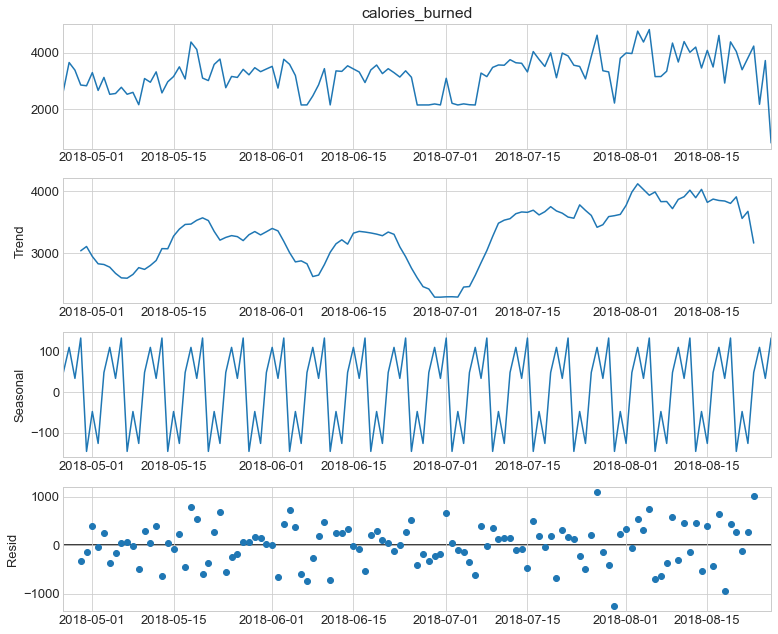

steps 



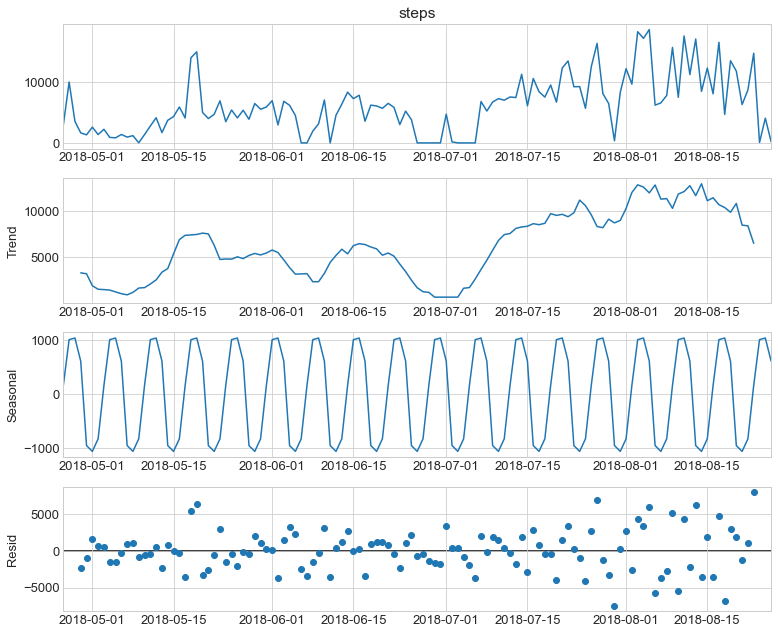

distance 



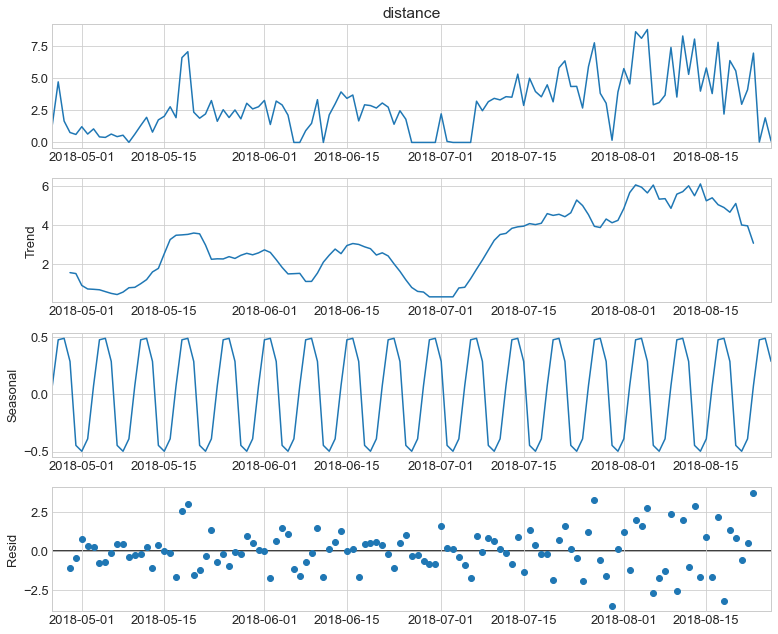

floors 



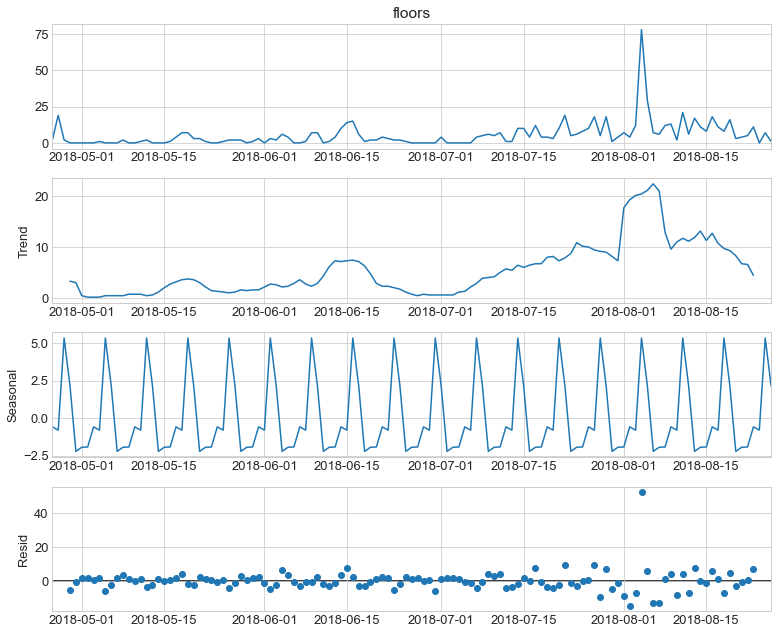

mins_sedentary 



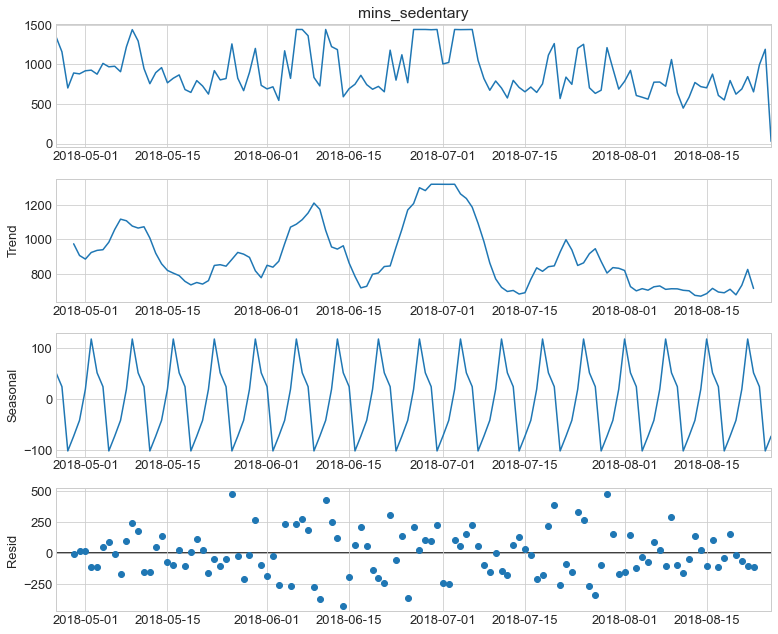

mins_light_active 



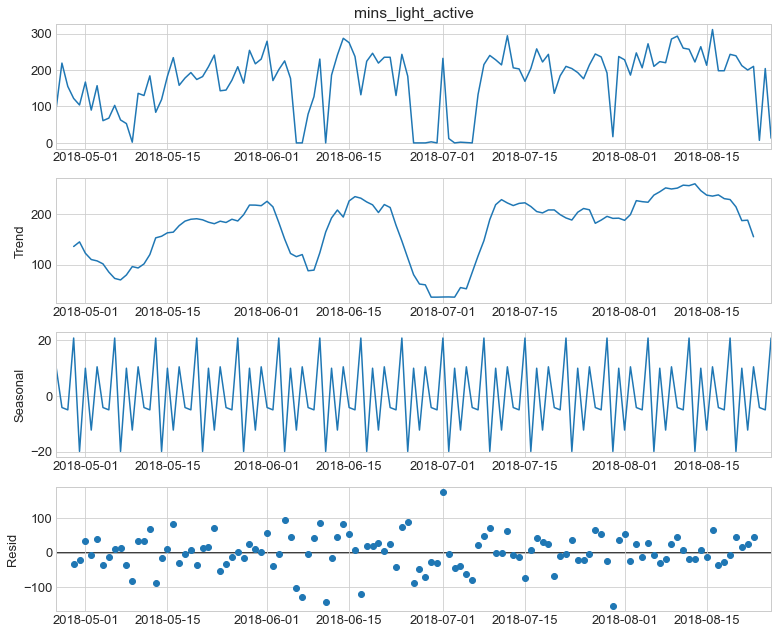

mins_fairly_active 



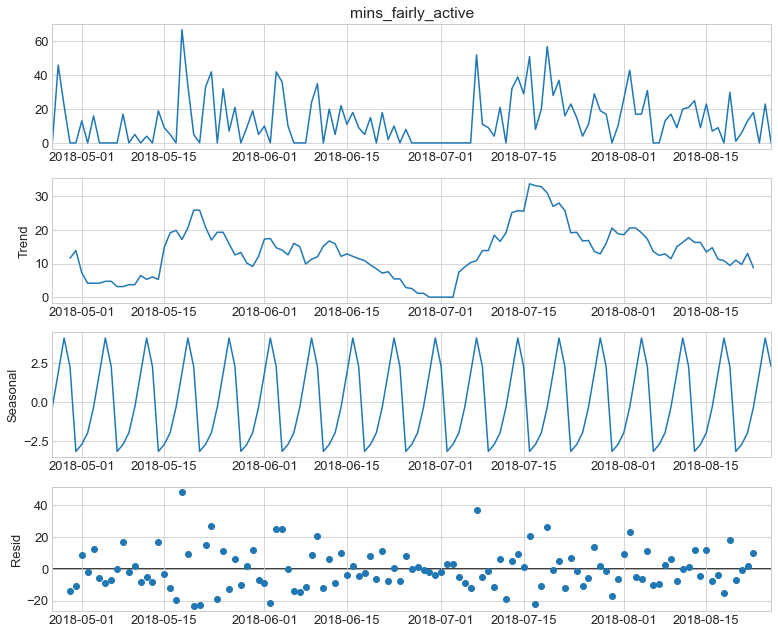

mins_very_active 



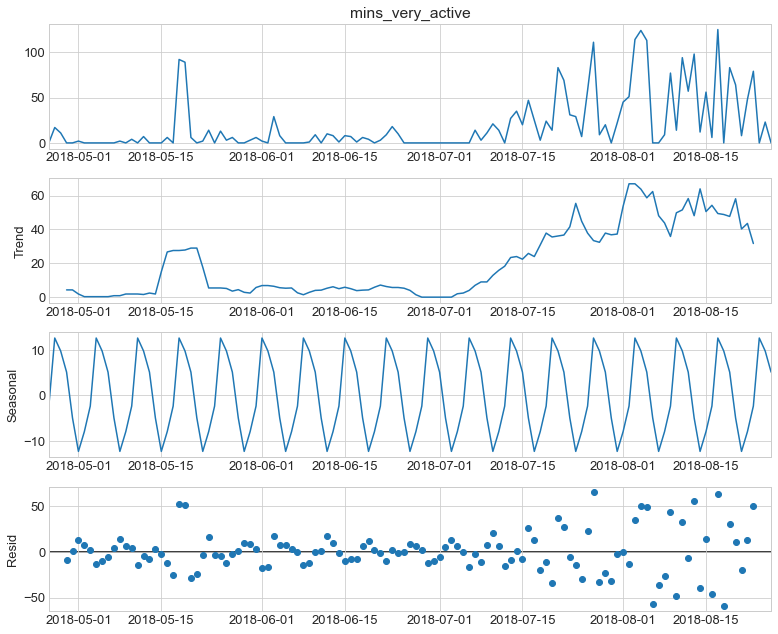

activity_calories 



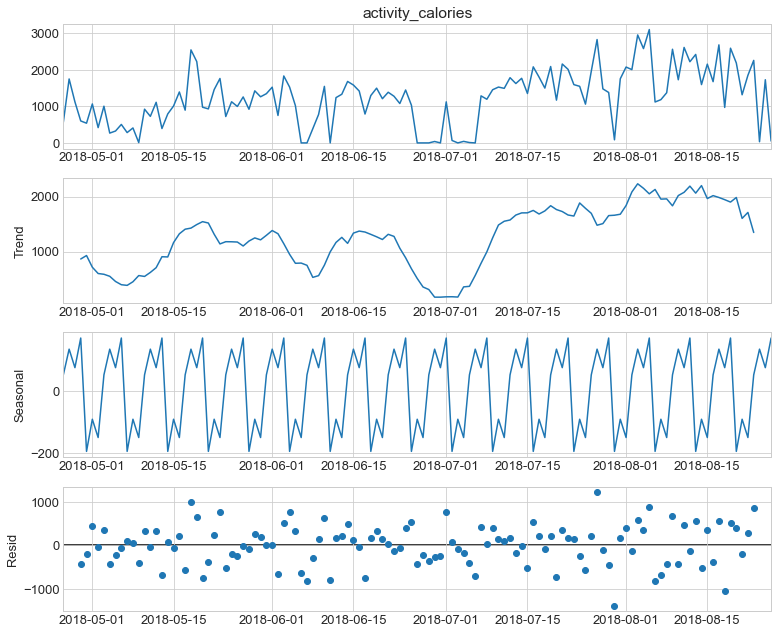

In [27]:
for col in train.columns:
    print(col,'\n')
    _ = sm.tsa.seasonal_decompose(train[col].resample('D').mean()).plot()
    plt.show()

#### Make Predictions and Apply to Observations:

In [28]:
for col in train.columns:
    model = Holt(train[col], exponential = False, damped=True)
    model = model.fit(smoothing_level = .1, 
                      smoothing_slope = .1, 
                      optimized = True)
    yhat_items = model.predict(start = validate.index[0], 
                               end = validate.index[-1])
    yhat_df[col] = round(yhat_items, 2)

#### Plot Actual Vs. Predicted Values:

calories_burned -- RMSE: 1782


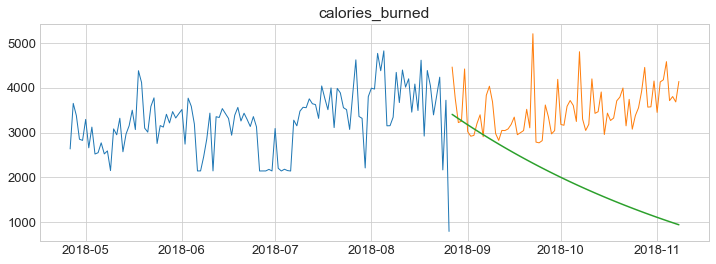

steps -- RMSE: 13646


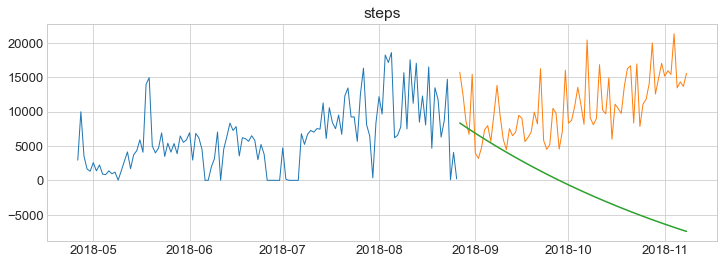

distance -- RMSE: 3


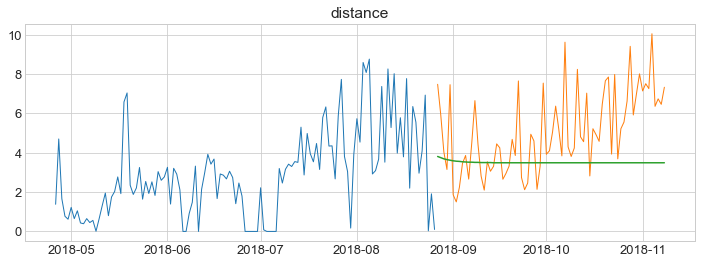

floors -- RMSE: 30


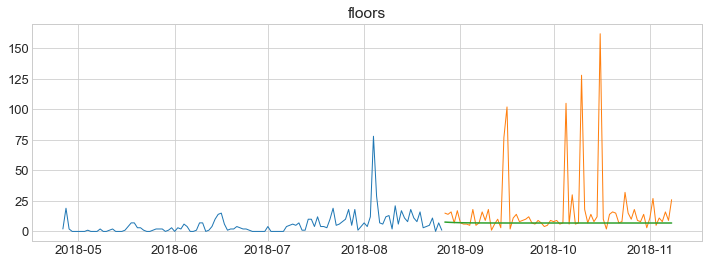

mins_sedentary -- RMSE: 151


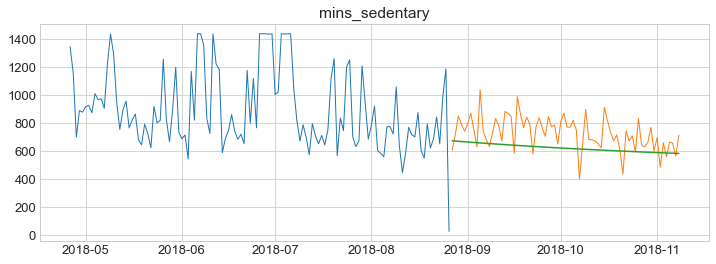

mins_light_active -- RMSE: 171


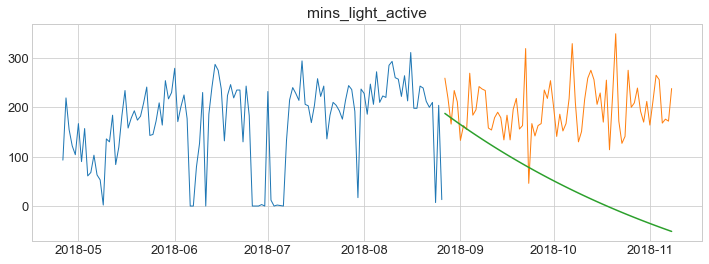

mins_fairly_active -- RMSE: 17


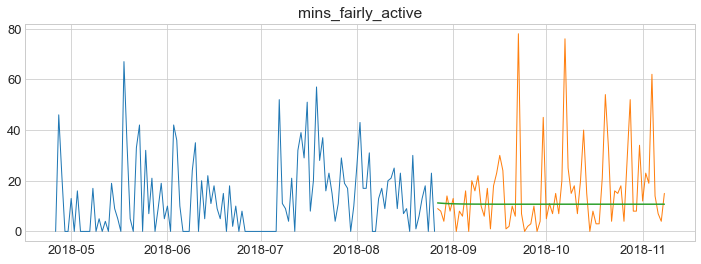

mins_very_active -- RMSE: 38


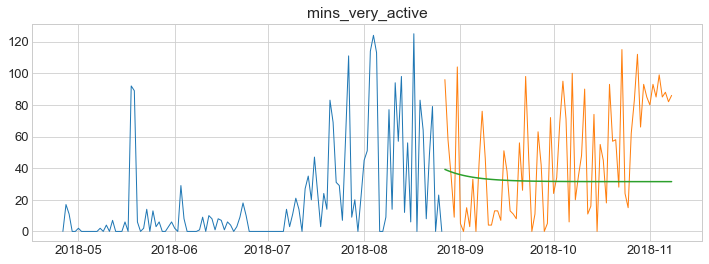

activity_calories -- RMSE: 1605


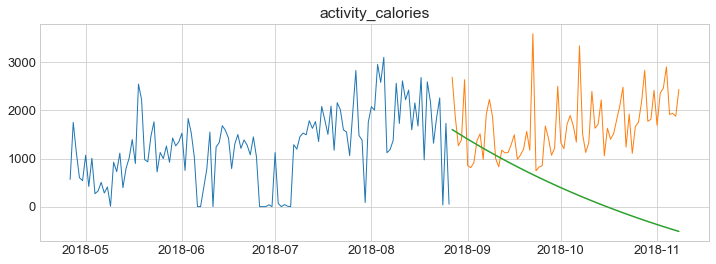

In [29]:
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

# Use Function to loop through columns
for col in train.columns:
    plot_and_eval(target_var = col)

#### Evauate:

In [30]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'Holts', 
                             target_var = col)

eval_df.sort_values('rmse')

model_type target_var     rmse
29    7d moving average   distance      2.0
65  104d moving average   distance      2.0
20    1d moving average   distance      2.0
74       30d_moving_avg   distance      2.0
38   12d moving average   distance      2.0
..                  ...        ...      ...
19    1d moving average      steps   4380.0
73       30d_moving_avg      steps   4380.0
10       simple_average      steps   6271.0
1   last_observed_value      steps  11348.0
82                Holts      steps  13646.0

[90 rows x 3 columns]

#### Takeaway:

`Model does not do a great job predicting trends and seasonality.`

<div class="alert alert-block alert-info"><b></b></div>

### Previous Cycle

***

### Resame Data w/7 Days Splits

#### Make Predictions:

In [31]:
df = wrangle.wrangle_fitbit_model()
df.head()

calories_burned   steps  distance  floors  mins_sedentary  \
date                                                                    
2018-04-26           2635.0  2931.0      1.38     2.0          1347.0   
2018-04-27           3649.0  9971.0      4.70    19.0          1158.0   
2018-04-28           3379.0  3521.0      1.66     2.0           702.0   
2018-04-29           2851.0  1639.0      0.77     0.0           891.0   
2018-04-30           2825.0  1323.0      0.62     0.0           880.0   

            mins_light_active  mins_fairly_active  mins_very_active  \
date                                                                  
2018-04-26               93.0                 0.0               0.0   
2018-04-27              219.0                46.0              17.0   
2018-04-28              155.0                22.0              11.0   
2018-04-29              122.0                 0.0               0.0   
2018-04-30              104.0                 0.0               0.0   

            activity_calories  
date                           
2018-04-26              566.0  
2018-04-27             1752.0  
2018-04-28             1124.0  
2018-04-29              602.0  
2018-04-30              540.0

In [32]:
train = df.loc[:'2018-11-22']
validate = df.loc['2018-11-23':'2018-11-29']
test = df.loc['2018-11-30':'2018-12-06']

print(train.shape)
print(validate.shape)
print(test.shape)

(211, 9)
(7, 9)
(7, 9)


#### Apply Predictions to Observations:

In [33]:
yhat_df = train['2018-11-16':'2018-11-22'] + train.diff(7).mean()
yhat_df.index = validate.index

#### Plot Actual Vs. Predicted Values:

calories_burned -- RMSE: 874


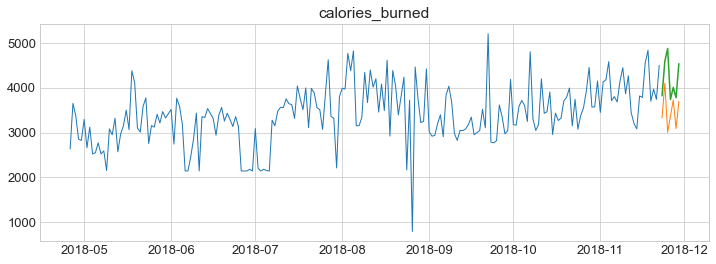

steps -- RMSE: 7881


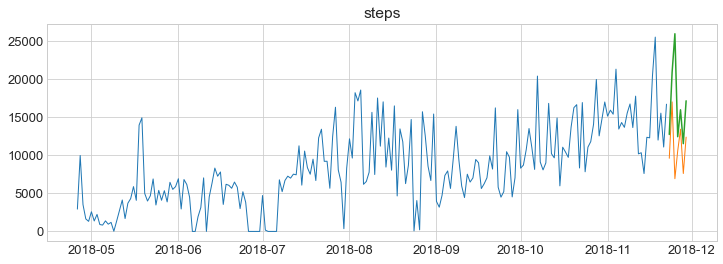

distance -- RMSE: 4


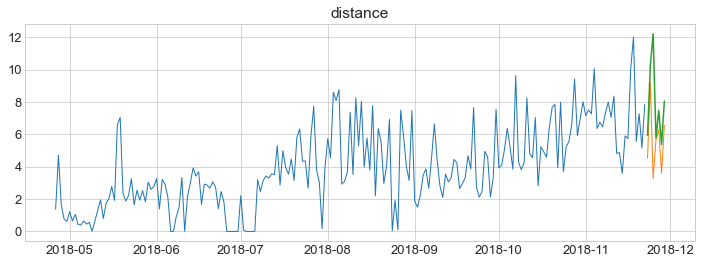

floors -- RMSE: 61


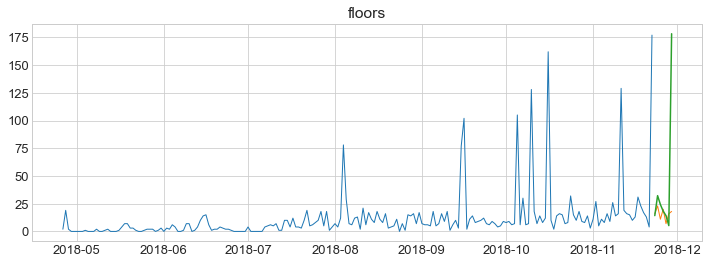

mins_sedentary -- RMSE: 144


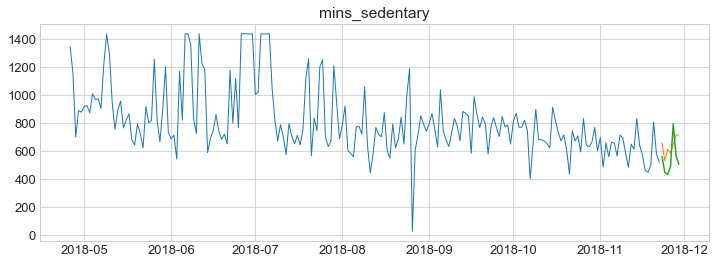

mins_light_active -- RMSE: 61


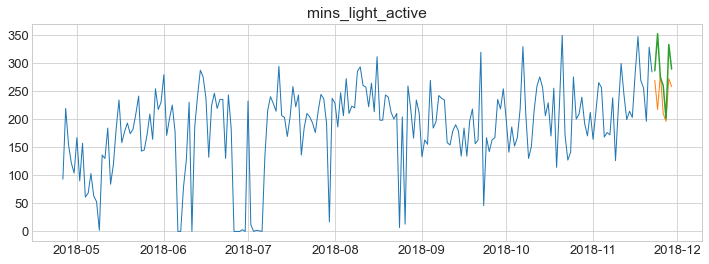

mins_fairly_active -- RMSE: 27


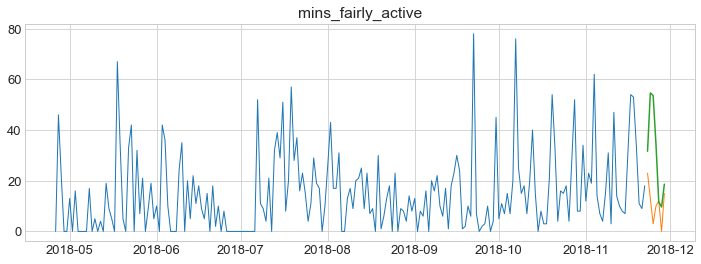

mins_very_active -- RMSE: 65


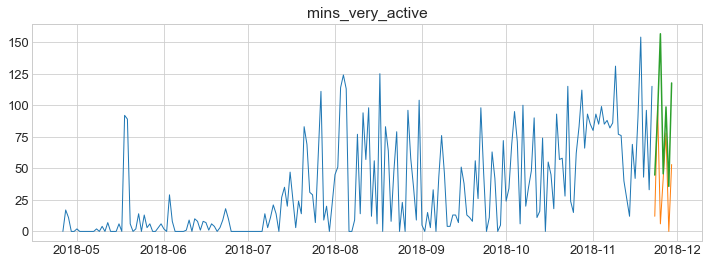

activity_calories -- RMSE: 1005


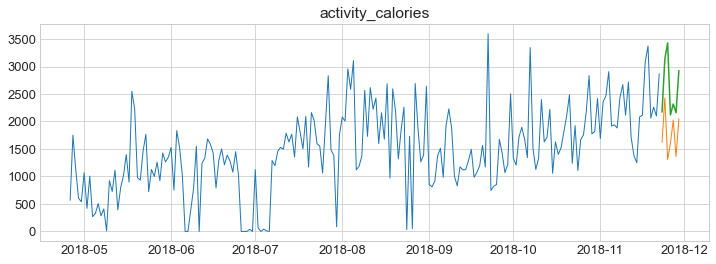

In [34]:
for col in train.columns:
    plot_and_eval(target_var = col)
    eval_df = append_eval_df(model_type = "previous_cycle", 
                            target_var = col)

#### Evauate:

In [35]:
pd.set_option('display.max_rows', None)
eval_df.groupby(['target_var', 'model_type'])[['rmse']].min()

rmse
target_var         model_type                  
activity_calories  104d moving average    630.0
                   12d moving average     630.0
                   1d moving average      630.0
                   26d moving average     630.0
                   30d_moving_avg         630.0
                   52d moving average     630.0
                   7d moving average      630.0
                   Holts                 1605.0
                   last_observed_value   1726.0
                   previous_cycle        1005.0
                   simple_average         744.0
calories_burned    104d moving average    540.0
                   12d moving average     540.0
                   1d moving average      540.0
                   26d moving average     540.0
                   30d_moving_avg         540.0
                   52d moving average     540.0
                   7d moving average      540.0
                   Holts                 1782.0
                   last_observed_value   2754.0
                   previous_cycle         874.0
                   simple_average         570.0
distance           104d moving average      2.0
                   12d moving average       2.0
                   1d moving average        2.0
                   26d moving average       2.0
                   30d_moving_avg           2.0
                   52d moving average       2.0
                   7d moving average        2.0
                   Holts                    3.0
                   last_observed_value      5.0
                   previous_cycle           4.0
                   simple_average           3.0
floors             104d moving average     29.0
                   12d moving average      29.0
                   1d moving average       29.0
                   26d moving average      29.0
                   30d_moving_avg          29.0
                   52d moving average      29.0
                   7d moving average       29.0
                   Holts                   30.0
                   last_observed_value     32.0
                   previous_cycle          61.0
                   simple_average          30.0
mins_fairly_active 104d moving average     16.0
                   12d moving average      16.0
                   1d moving average       16.0
                   26d moving average      16.0
                   30d_moving_avg          16.0
                   52d moving average      16.0
                   7d moving average       16.0
                   Holts                   17.0
                   last_observed_value     23.0
                   previous_cycle          27.0
                   simple_average          17.0
mins_light_active  104d moving average     53.0
                   12d moving average      53.0
                   1d moving average       53.0
                   26d moving average      53.0
                   30d_moving_avg          53.0
                   52d moving average      53.0
                   7d moving average       53.0
                   Holts                  171.0
                   last_observed_value    193.0
                   previous_cycle          61.0
                   simple_average          59.0
mins_sedentary     104d moving average    116.0
                   12d moving average     116.0
                   1d moving average      116.0
                   26d moving average     116.0
                   30d_moving_avg         116.0
                   52d moving average     116.0
                   7d moving average      116.0
                   Holts                  151.0
                   last_observed_value    711.0
                   previous_cycle         144.0
                   simple_average         205.0
mins_very_active   104d moving average     35.0
                   12d moving average      35.0
                   1d moving average       35.0
                   26d moving average      35.0
                   30d_moving_avg          35.0
           

#### Takeaway:

`7d moving average will move on to test`

<div class="alert alert-block alert-info"><b></b></div>

## Test:

<div class="alert alert-block alert-info"><b></b></div>

#### Resample:

In [36]:
# Resample, Not Using Previous Cycle
df = wrangle.wrangle_fitbit_model()
df = df.dropna()
train_size = int(len(df)*.8)
test_size = int(len(df) - train_size)

train = df[:train_size]
test = df[train_size:]

train.shape, test.shape

((180, 9), (45, 9))

#### Values to Beat (Validate)

In [37]:
test_eval = pd.DataFrame(eval_df[eval_df.model_type == '7d moving average'])
test_eval

model_type          target_var    rmse
27  7d moving average     calories_burned   540.0
28  7d moving average               steps  4380.0
29  7d moving average            distance     2.0
30  7d moving average              floors    29.0
31  7d moving average      mins_sedentary   116.0
32  7d moving average   mins_light_active    53.0
33  7d moving average  mins_fairly_active    16.0
34  7d moving average    mins_very_active    35.0
35  7d moving average   activity_calories   630.0

#### Make Predictions:

In [38]:
# 7 Day Rolling average (some weekly seasonality)

period = 7 

# calories_burned Prediction
calories_burned  = round(train['calories_burned'].rolling(period).mean()[-1], 2)
# steps prediction
steps = round(train['steps'].rolling(period).mean()[-1], 2)
# distance prediction
distance = round(train['distance'].rolling(period).mean()[-1], 2)
# floors prediction
floors = round(train['floors'].rolling(period).mean()[-1], 2)
# mins_sedentary
mins_sedentary = round(train['mins_sedentary'].rolling(period).mean()[-1], 2)
# mins_light_active
mins_light_active = round(train['mins_light_active'].rolling(period).mean()[-1], 2)
#mins_fairly_active
mins_fairly_active = round(train['mins_fairly_active'].rolling(period).mean()[-1], 2)
#'mins_very_active'
mins_very_active = round(train['mins_very_active'].rolling(period).mean()[-1], 2)
# activity_calories
activity_calories = round(train['activity_calories'].rolling(period).mean()[-1], 2)

#### Apply Predictions to Observations

In [39]:
yhat_df = pd.DataFrame({'calories_burned': [calories_burned], 
                        'steps': [steps],
                        'distance': [distance],
                        'floors': [floors],
                        'mins_sedentary': [mins_sedentary],
                        'mins_light_active': [mins_light_active],
                        'mins_fairly_active': [mins_fairly_active],
                        'mins_very_active': [mins_very_active],
                        'activity_calories': [activity_calories]},
                      index = test.index)
yhat_df.head()

calories_burned    steps  distance  floors  mins_sedentary  \
date                                                                     
2018-10-23          3522.43  12304.0       5.8   32.29          677.43   
2018-10-24          3522.43  12304.0       5.8   32.29          677.43   
2018-10-25          3522.43  12304.0       5.8   32.29          677.43   
2018-10-26          3522.43  12304.0       5.8   32.29          677.43   
2018-10-27          3522.43  12304.0       5.8   32.29          677.43   

            mins_light_active  mins_fairly_active  mins_very_active  \
date                                                                  
2018-10-23             216.14                18.0             50.57   
2018-10-24             216.14                18.0             50.57   
2018-10-25             216.14                18.0             50.57   
2018-10-26             216.14                18.0             50.57   
2018-10-27             216.14                18.0             50.57   

            activity_calories  
date                           
2018-10-23            1741.71  
2018-10-24            1741.71  
2018-10-25            1741.71  
2018-10-26            1741.71  
2018-10-27            1741.71

#### Plot Actual Vs. Predicted Values:

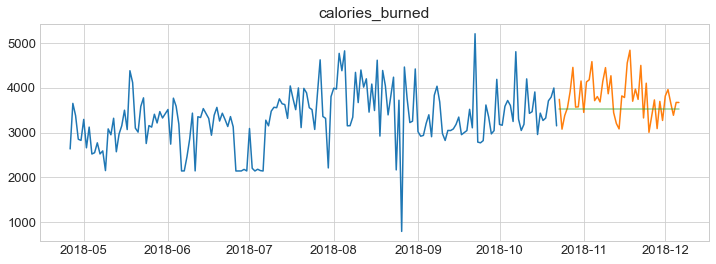

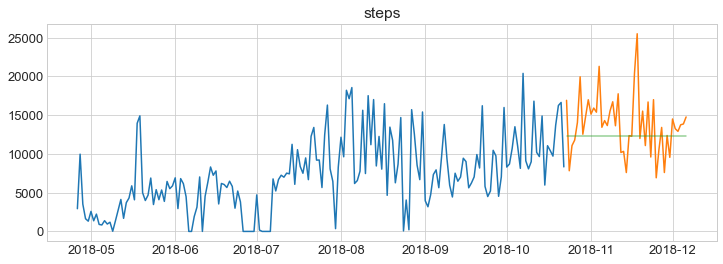

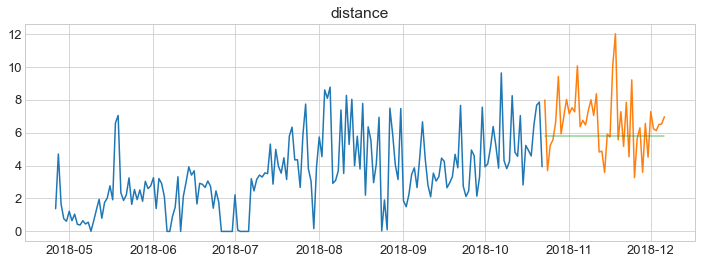

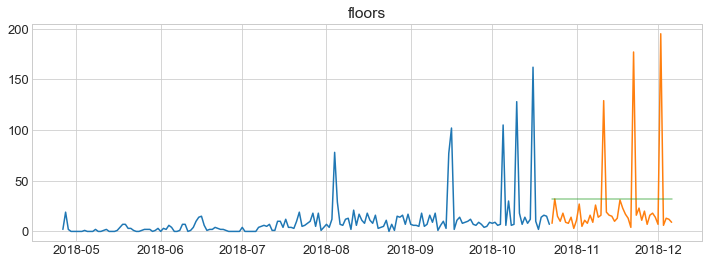

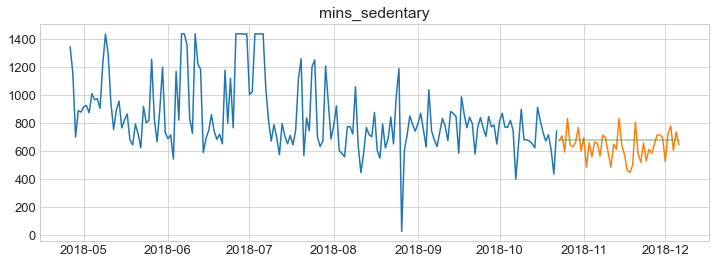

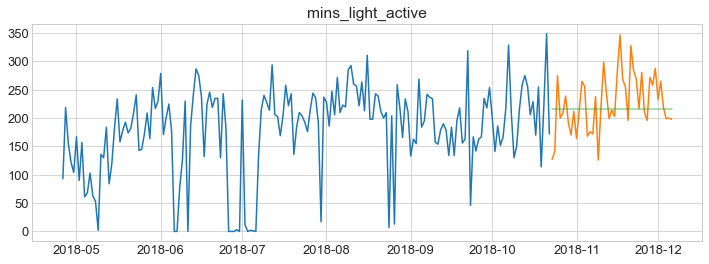

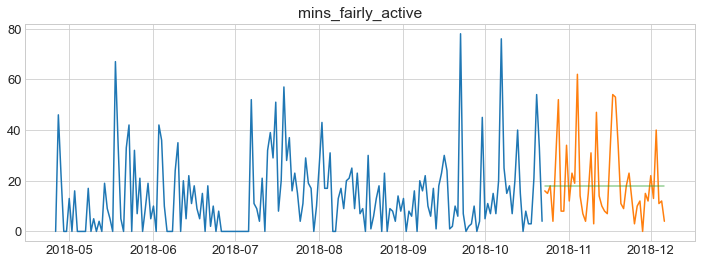

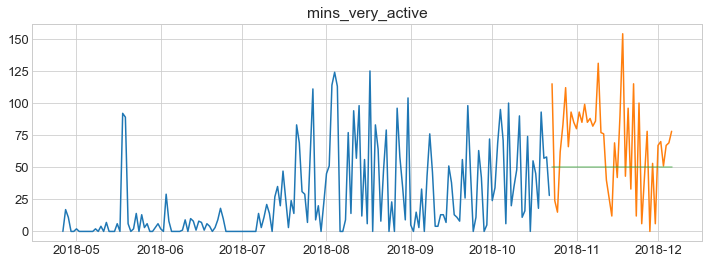

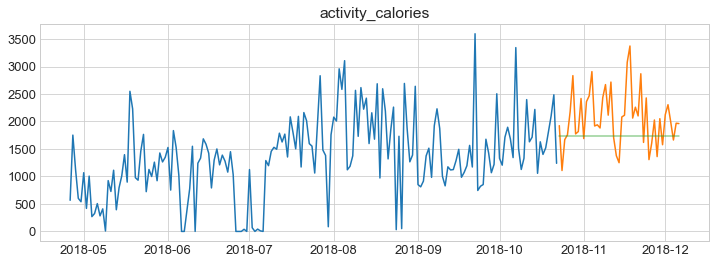

In [40]:
def final_plot(target_var):
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var], label='train')
    plt.plot(test[target_var], label='test')
    plt.plot(yhat_df[target_var], alpha=.5)
    plt.title(target_var)
    plt.show()
    
for col in train.columns:
    final_plot(col)

#### Evaluate:

In [41]:
rmse_calories_burned = sqrt(mean_squared_error(test['calories_burned'],yhat_df['calories_burned']))
rmse_steps = sqrt(mean_squared_error(test['steps'], yhat_df['steps']))
rmse_distance = sqrt(mean_squared_error(test['distance'], yhat_df['distance']))
rmse_floors = sqrt(mean_squared_error(test['floors'], yhat_df['floors']))
rmse_mins_sedentary = sqrt(mean_squared_error(test['mins_sedentary'], yhat_df['mins_sedentary']))
rmse_mins_light_active = sqrt(mean_squared_error(test['mins_light_active'], yhat_df['mins_light_active']))
rmse_mins_fairly_active = sqrt(mean_squared_error(test['mins_fairly_active'], yhat_df['mins_fairly_active']))
rmse_mins_very_active = sqrt(mean_squared_error(test['mins_very_active'], yhat_df['mins_very_active']))
rmse_activity_calories= sqrt(mean_squared_error(test['activity_calories'], yhat_df['activity_calories']))

print('rmse_calories_burned: ', rmse_calories_burned)
print('rmse_steps: ', rmse_steps)
print('rmse_distance: ', rmse_distance)
print('rmse_floors: ', rmse_floors)
print('rmse_sedentary: ', rmse_mins_sedentary)
print('rmse_light_active: ', rmse_mins_light_active)
print('rmse_fairly_active: ', rmse_mins_fairly_active)
print('rmse_very_active: ', rmse_mins_very_active)
print('rmse_activity_calories: ', rmse_activity_calories)

rmse_calories_burned:  503.31904837345036
rmse_steps:  4011.7670060848636
rmse_distance:  1.9626252260117765
rmse_floors:  40.15538278570716
rmse_sedentary:  101.39050804795397
rmse_light_active:  50.36056702531367
rmse_fairly_active:  15.219139996143745
rmse_very_active:  38.843212048210205
rmse_activity_calories:  588.8882030195167


In [42]:
def final_evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(test[target_var], yhat_df[target_var])), 0)
    return rmse

# function to store rmse for comparison purposes
def final_append_eval_df(model_type, target_var):
    rmse = final_evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return test_eval.append(d, ignore_index = True)

for col in train.columns:
    test_eval = final_append_eval_df(model_type = '7d test', 
                             target_var = col)

#### How did we do?

In [43]:
test_eval

model_type          target_var    rmse
0   7d moving average     calories_burned   540.0
1   7d moving average               steps  4380.0
2   7d moving average            distance     2.0
3   7d moving average              floors    29.0
4   7d moving average      mins_sedentary   116.0
5   7d moving average   mins_light_active    53.0
6   7d moving average  mins_fairly_active    16.0
7   7d moving average    mins_very_active    35.0
8   7d moving average   activity_calories   630.0
9             7d test     calories_burned   503.0
10            7d test               steps  4012.0
11            7d test            distance     2.0
12            7d test              floors    40.0
13            7d test      mins_sedentary   101.0
14            7d test   mins_light_active    50.0
15            7d test  mins_fairly_active    15.0
16            7d test    mins_very_active    39.0
17            7d test   activity_calories   589.0

#### Model Preformance (Baseline)

In [44]:
# Define baseline as last observed value
baseline = pd.DataFrame(eval_df[eval_df.model_type == 'last_observed_value'])

# Calcuating % improvement
# First: work out the difference (increase) between the two numbers you are comparing
base_error = baseline.rmse.sum()
test_error = test_eval[test_eval.model_type =='7d test'].rmse.sum()
difference = (base_error - test_error)
# Then: divide the increase by the original number and multiply the answer by 100
percent_improve = round((difference / base_error) * 100, 2)
print(f'The % improvement for our model is {percent_improve}%')

The % improvement for our model is 68.25%


<div class="alert alert-block alert-info"><b></b></div>

## Project Summary:

<div class="alert alert-block alert-info"><b></b></div>

`General trends in the data demonstrate a slight upward trend in calories and activity over time, with the majority of higher activity levels occuring on the weekend. The lack of regular exercise, the lenght of time sedentary and the the missing food data suggests that this fitness tracker belongs to an employee. While the model was able to improve on baseline observations I was not able to match a model to weekly seasonality. There exists the possibility that alternate modeling techiniques (TSA with Prophet) would return better results. However, that modeling technique was not included in this study.`

<div class="alert alert-block alert-info"><b></b></div>

## Next Steps:

<div class="alert alert-block alert-info"><b></b></div>

`- Not Enough Data: With only seven months of data, it was hard to pick up on longterm trends in seasonality. More data would have yeilded better results.`

`- New Model: Spending time refining previous-cycle model and exploring Prophet will improve model forcasting.`
    
`- Cross Validation: Time-based splitting can provide statistically robust model evaluation and best simulate real-life scenarios. Exploring the use of time-based cross validation to form a type of “sliding window” average would most likely lead to better model results.`


<div class="alert alert-block alert-info"><b></b></div>

## Predict Missing 2 Weeks:

<div class="alert alert-block alert-info"><b></b></div>

#### Resample Data Set = Train 

In [45]:
df = wrangle.wrangle_fitbit_model()
df = df.dropna()
train = df

In [46]:
yhat_df.index = test.index + pd.Timedelta('2W')
yhat_df

calories_burned    steps  distance  floors  mins_sedentary  \
date                                                                     
2018-11-06          3522.43  12304.0       5.8   32.29          677.43   
2018-11-07          3522.43  12304.0       5.8   32.29          677.43   
2018-11-08          3522.43  12304.0       5.8   32.29          677.43   
2018-11-09          3522.43  12304.0       5.8   32.29          677.43   
2018-11-10          3522.43  12304.0       5.8   32.29          677.43   
2018-11-11          3522.43  12304.0       5.8   32.29          677.43   
2018-11-12          3522.43  12304.0       5.8   32.29          677.43   
2018-11-13          3522.43  12304.0       5.8   32.29          677.43   
2018-11-14          3522.43  12304.0       5.8   32.29          677.43   
2018-11-15          3522.43  12304.0       5.8   32.29          677.43   
2018-11-16          3522.43  12304.0       5.8   32.29          677.43   
2018-11-17          3522.43  12304.0       5.8   32.29          677.43   
2018-11-18          3522.43  12304.0       5.8   32.29          677.43   
2018-11-19          3522.43  12304.0       5.8   32.29          677.43   
2018-11-20          3522.43  12304.0       5.8   32.29          677.43   
2018-11-21          3522.43  12304.0       5.8   32.29          677.43   
2018-11-22          3522.43  12304.0       5.8   32.29          677.43   
2018-11-23          3522.43  12304.0       5.8   32.29          677.43   
2018-11-24          3522.43  12304.0       5.8   32.29          677.43   
2018-11-25          3522.43  12304.0       5.8   32.29          677.43   
2018-11-26          3522.43  12304.0       5.8   32.29          677.43   
2018-11-27          3522.43  12304.0       5.8   32.29          677.43   
2018-11-28          3522.43  12304.0       5.8   32.29          677.43   
2018-11-29          3522.43  12304.0       5.8   32.29          677.43   
2018-11-30          3522.43  12304.0       5.8   32.29          677.43   
2018-12-01          3522.43  12304.0       5.8   32.29          677.43   
2018-12-02          3522.43  12304.0       5.8   32.29          677.43   
2018-12-03          3522.43  12304.0       5.8   32.29          677.43   
2018-12-04          3522.43  12304.0       5.8   32.29          677.43   
2018-12-05          3522.43  12304.0       5.8   32.29          677.43   
2018-12-06          3522.43  12304.0       5.8   32.29          677.43   
2018-12-07          3522.43  12304.0       5.8   32.29          677.43   
2018-12-08          3522.43  12304.0       5.8   32.29          677.43   
2018-12-09          3522.43  12304.0       5.8   32.29          677.43   
2018-12-10          3522.43  12304.0       5.8   32.29          677.43   
2018-12-11          3522.43  12304.0       5.8   32.29          677.43   
2018-12-12          3522.43  12304.0       5.8   32.29          677.43   
2018-12-13          3522.43  12304.0       5.8   32.29          677.43   
2018-12-14          3522.43  12304.0       5.8   32.29          677.43   
2018-12-15          3522.43  12304.0       5.8   32.29          677.43   
2018-12-16          3522.43  12304.0       5.8   32.29          677.43   
2018-12-17          3522.43  12304.0       5.8   32.29          677.43   
2018-12-18          3522.43  12304.0       5.8   32.29          677.43   
2018-12-19          3522.43  12304.0       5.8   32.29          677.43   
2018-12-20          3522.43  12304.0       5.8   32.29          677.43   

            mins_light_active  mins_fairly_active  mins_very_active  \
date                                                                  
2018-11-06             216.14                18.0             50.57   
2018-11-07             216.14                18.0             50.57   
2018-11-08             216.14                18.0             50.57   
2018-11-09             216.14                18.0             50.57   
2018-11-10             216.14                18.0             50.57   
2018-11-11             216.14       

#### Visualize Missing Data

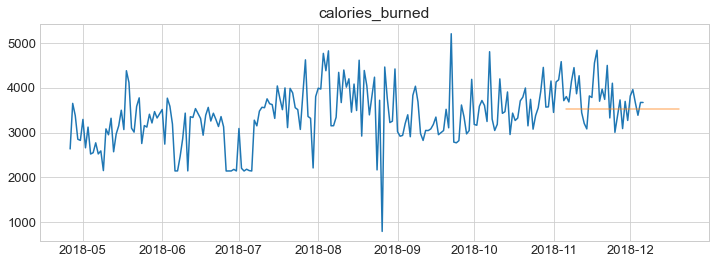

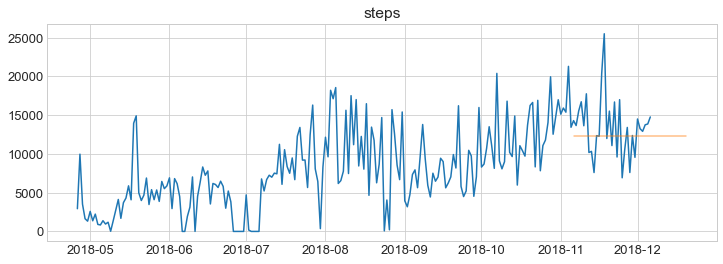

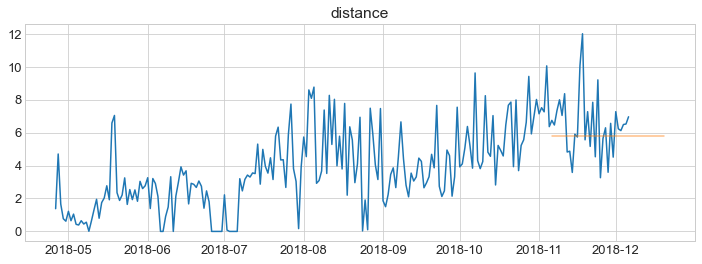

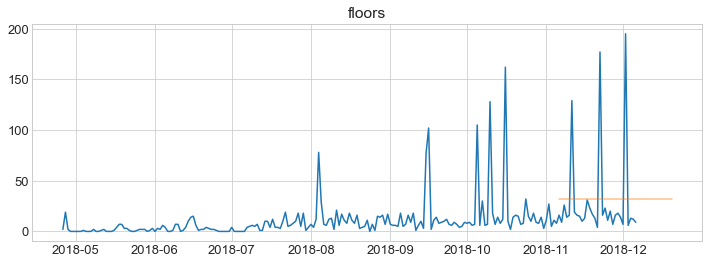

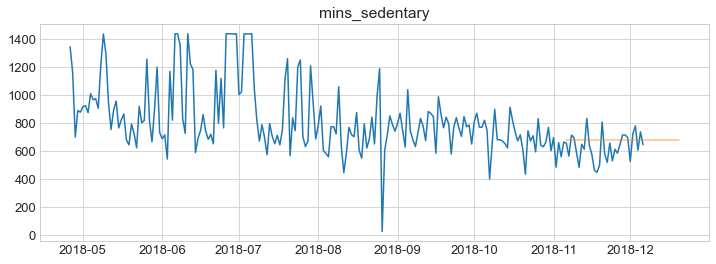

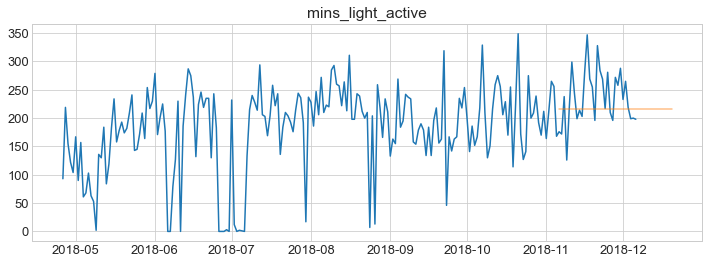

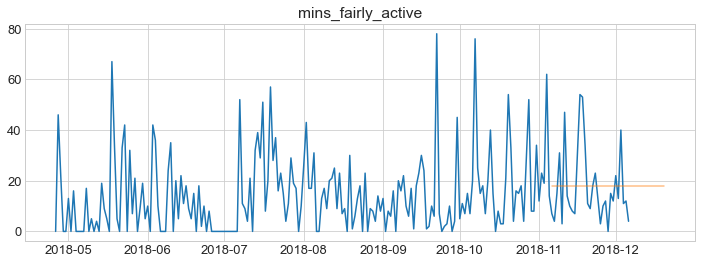

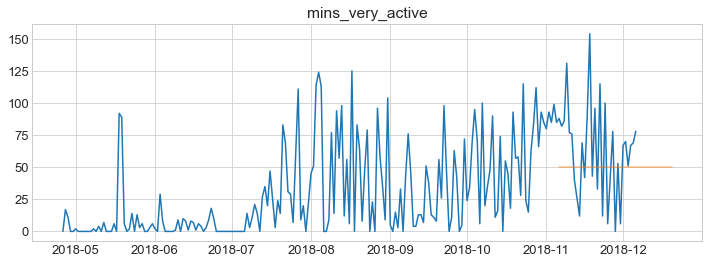

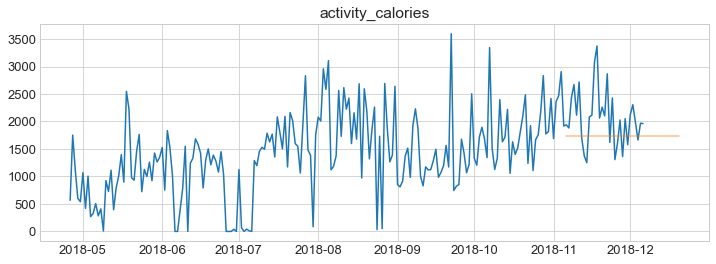

In [47]:
def final_plot(target_var):
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var], label='train')
    plt.plot(yhat_df[target_var], alpha=.5)
    plt.title(target_var)
    plt.show()

for col in train.columns:
    final_plot(col)

#### Create CSV of Two Week Predictions:

In [48]:
#yhat_df.to_csv('predictions_2weeks')